# Impact of Environmental, Social And Governance News on the Stock Market Indices

In [1]:
#Import packages
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas-datareader
import pandas_datareader
import datetime
import pandas_datareader.data as web
import requests

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
!pip install TextBlob
from textblob import TextBlob

from pandas_datareader import data as pdr
!pip install yfinance
import yfinance

import scipy.stats as stats
import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')

!pip install wordcloud
from wordcloud import WordCloud
import re

#Use VADER
!pip install vadersentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import os

!pip install feedparser
import feedparser as fp
import json

!pip install newspaper3k
import newspaper
from newspaper import Article
from time import mktime

from datetime import datetime, timedelta
import time
import pprint

%matplotlib inline

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
from PIL import Image
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import os

!pip install feedparser
import feedparser as fp
import json

!pip install newspaper3k
import newspaper
from newspaper import Article
from time import mktime

from datetime import datetime, timedelta
import time
import pprint

import nltk
nltk.download('vader_lexicon')

import json
import requests
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta

import glob

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to C:\Users\Shivam
[nltk_data]     Dixit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


[nltk_data] Downloading package wordnet to C:\Users\Shivam
[nltk_data]     Dixit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.3, however version 20.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
[nltk_data] Downloading package vader_lexicon to C:\Users\Shivam
[nltk_data]     Dixit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#This will be used when creating graphs to order the days and months
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
order_month = ['January','February','March','April','May','June','July','August','September','October','November','December']

## Loading Data

### Stock Indices Data

#### FTSE 100

In [3]:
ftse = pd.read_csv('FTSE 100 Historical Data.csv')
ftse.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,"Dec 31, 2019","7,542.44","7,587.05","7,587.41","7,532.38",212.14M,-0.59%
1,"Dec 30, 2019","7,587.05","7,644.90","7,644.90","7,587.05",304.24M,-0.76%
2,"Dec 27, 2019","7,644.90","7,632.24","7,665.40","7,622.46",311.11M,0.17%
3,"Dec 24, 2019","7,632.24","7,623.59","7,636.16","7,608.22",185.67M,0.11%
4,"Dec 23, 2019","7,623.59","7,582.48","7,628.20","7,559.63",539.14M,0.54%


In [4]:
ftse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    253 non-null    object
 1   Price   253 non-null    object
 2   Open    253 non-null    object
 3   High    253 non-null    object
 4   Low     253 non-null    object
 5   Volume  253 non-null    object
 6   Chg%    253 non-null    object
dtypes: object(7)
memory usage: 14.0+ KB


In [5]:
ftse.describe()

,Date,Price,Open,High,Low,Volume,Chg%
count,253,253,253,253,253,253,253
unique,253,253,253,253,253,250,166
top,"Aug 13, 2019","7,446.87","7,446.87","7,436.18","7,367.44",1.05B,-0.08%
freq,1,1,1,1,1,2,6


In [6]:
#use yfinance and pandas data reader to import the S&P500 index values 
SP500 = pdr.get_data_yahoo('^GSPC', 
                          start='2019, 01, 1', 
                          end='2019, 12, 31')
SP500.reset_index(inplace=True)
SP500.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,2509.239990,2482.820068,2498.939941,2506.850098,3442870000,2506.850098
1,2019-01-02,2519.489990,2467.469971,2476.959961,2510.030029,3733160000,2510.030029
2,2019-01-03,2493.139893,2443.959961,2491.919922,2447.889893,3822860000,2447.889893
3,2019-01-04,2538.070068,2474.330078,2474.330078,2531.939941,4213410000,2531.939941
4,2019-01-07,2566.159912,2524.560059,2535.610107,2549.689941,4104710000,2549.689941


In [7]:
SP500.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,2921.984467,2897.793208,2909.996449,2911.749636,3.540357e+09,2911.749636
std,151.333134,155.696196,154.148616,152.525432,5.676189e+08,152.525432
min,2493.139893,2443.959961,2474.330078,2447.889893,1.296540e+09,2447.889893
25%,2836.030029,2803.989990,2820.120117,2822.239990,3.222570e+09,2822.239990
50%,2930.790039,2900.709961,2916.040039,2918.649902,3.500760e+09,2918.649902
75%,3007.979980,2990.669922,3001.500000,3000.929932,3.804380e+09,3000.929932
max,3247.929932,3234.370117,3247.229980,3240.020020,6.454270e+09,3240.020020


In [8]:
#Import the exchange rate dataset for AUD/USD
FXUSD = pd.read_csv('USD_GBP Historical Data.csv')
FXUSD.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,"Dec 31, 2019",1.3261,1.3117,1.3285,1.3106,97.86K,1.11%
1,"Dec 30, 2019",1.3115,1.3067,1.3152,1.3066,100.82K,0.29%
2,"Dec 27, 2019",1.3077,1.2993,1.3118,1.2967,85.56K,0.65%
3,"Dec 26, 2019",1.2993,1.2961,1.3016,1.2951,99.65K,0.25%
4,"Dec 25, 2019",1.2961,1.2942,1.2989,1.2918,34.43K,0.12%


In [9]:
FXUSD.describe()

,Price,Open,High,Low
count,261.000000,261.000000,261.000000,261.000000
mean,1.276838,1.276584,1.281838,1.271618
std,0.033295,0.033160,0.033510,0.033040
min,1.203700,1.204900,1.209900,1.195900
25%,1.252100,1.251800,1.256600,1.245900
50%,1.285200,1.285300,1.290000,1.281400
75%,1.303700,1.303800,1.308200,1.298700
max,1.333900,1.334100,1.351600,1.332100


<b> <u> Comments</u> </b>
<br>
FTSE 100 data and  USD/GBP exchange rate was obtained from investing.com[9][11] and S&P500 information uses the yfinance and pandas datareader package[12][13].


### News Data

In [10]:
guardian_api = '8ca75031-03ce-4640-80b3-9accc793d8e6'

In [11]:
ARTICLES_DIR = join('tempdata', 'newsarticles') #Create a temporary directory to save the news articles
makedirs(ARTICLES_DIR, exist_ok=True)
# Sample URL - obtained from guardian to search for news articles
#
# http://content.guardianapis.com/search?q=news
# &api-key=your-api-key-goes-here

API_ENDPOINT = 'http://content.guardianapis.com/search?q=news'
my_params = {
    'from-date': "2019-01-01",
    'to-date': "2019-12-31",
    'order-by': "newest",
    'show-fields': 'all',
    'page-size': 200,
    'api-key': guardian_api
}

In [12]:
my_params

{'from-date': '2019-01-01',
 'to-date': '2019-12-31',
 'order-by': 'newest',
 'show-fields': 'all',
 'page-size': 200,
 'api-key': '8ca75031-03ce-4640-80b3-9accc793d8e6'}

In [14]:

start_date = date(2019, 1, 1)
end_date = date(2019,12, 31) #ONLY ALLOWED 5,000 API REQUESTS SO SPLIT INTO BATCHES
dayrange = range((end_date - start_date).days + 1)
for daycount in dayrange:
    dt = start_date + timedelta(days=daycount)
    datestr = dt.strftime('%Y-%m-%d')
    fname = join(ARTICLES_DIR, datestr + '.json')
    if not exists(fname):
        # then let's download it
        print("Downloading", datestr)
        all_results = []
        my_params['from-date'] = datestr
        my_params['to-date'] = datestr
        current_page = 1
        total_pages = 1
        while current_page <= total_pages:
            print("...page", current_page)
            my_params['page'] = current_page
            resp = requests.get(API_ENDPOINT, my_params)
            data = resp.json()
            all_results.extend(data['response']['results'])
            # if there is more than one page
            current_page += 1
            total_pages = data['response']['pages']

        with open(fname, 'w') as f:
            print("Writing to", fname)

            # re-serialize it for pretty indentation
            f.write(json.dumps(all_results, indent=2)) #create separate json files for each day and save it in the tempdata/articles/ folder

<b><u>Comments</u></b>

The Guardian has released an API to request news articles from the website. The Guardian allows 5,000 API calls per day. The range is from 10/05/2005 to 10/05/2020, which has more than 5,000 API calls, hence code has been run over 3 days to avoid reaching the maximum calls. 

## Read in the JSON files 

In [15]:
#Find names of all files in the folder tempdata/newsarticles/ with the extension .json
pattern = 'tempdata/newsarticles/*.json'

json_files = glob.glob(pattern)

print(json_files)

['tempdata/newsarticles\\2019-01-01.json', 'tempdata/newsarticles\\2019-01-02.json', 'tempdata/newsarticles\\2019-01-03.json', 'tempdata/newsarticles\\2019-01-04.json', 'tempdata/newsarticles\\2019-01-05.json', 'tempdata/newsarticles\\2019-01-06.json', 'tempdata/newsarticles\\2019-01-07.json', 'tempdata/newsarticles\\2019-01-08.json', 'tempdata/newsarticles\\2019-01-09.json', 'tempdata/newsarticles\\2019-01-10.json', 'tempdata/newsarticles\\2019-01-11.json', 'tempdata/newsarticles\\2019-01-12.json', 'tempdata/newsarticles\\2019-01-13.json', 'tempdata/newsarticles\\2019-01-14.json', 'tempdata/newsarticles\\2019-01-15.json', 'tempdata/newsarticles\\2019-01-16.json', 'tempdata/newsarticles\\2019-01-17.json', 'tempdata/newsarticles\\2019-01-18.json', 'tempdata/newsarticles\\2019-01-19.json', 'tempdata/newsarticles\\2019-01-20.json', 'tempdata/newsarticles\\2019-01-21.json', 'tempdata/newsarticles\\2019-01-22.json', 'tempdata/newsarticles\\2019-01-23.json', 'tempdata/newsarticles\\2019-01-2

In [16]:
json2 = pd.read_json(json_files[1])

In [17]:
json2

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,business/2019/jan/03/australian-dollar-hits-10...,article,business,Business,2019-01-02T23:16:09Z,Australian dollar hits 10-year low after dippi...,https://www.theguardian.com/business/2019/jan/...,https://content.guardianapis.com/business/2019...,{'headline': 'Australian dollar hits 10-year l...,False,pillar/news,News
1,tv-and-radio/2019/jan/02/waco-madman-or-messia...,article,tv-and-radio,Television & radio,2019-01-02T22:30:00Z,Waco: Madman or Messiah? review – the remarkab...,https://www.theguardian.com/tv-and-radio/2019/...,https://content.guardianapis.com/tv-and-radio/...,{'headline': 'Waco: Madman or Messiah? review ...,False,pillar/arts,Arts
2,football/live/2019/jan/02/chelsea-v-southampto...,liveblog,football,Football,2019-01-02T22:17:42Z,"Chelsea 0-0 Southampton, Huddersfield 1-2 Burn...",https://www.theguardian.com/football/live/2019...,https://content.guardianapis.com/football/live...,"{'headline': 'Chelsea 0-0 Southampton, Hudders...",False,pillar/sport,Sport
3,australia-news/2019/jan/03/victorian-governmen...,article,australia-news,Australia news,2019-01-02T19:00:23Z,Victorian government challenged for not releas...,https://www.theguardian.com/australia-news/201...,https://content.guardianapis.com/australia-new...,{'headline': 'Victorian government challenged ...,False,pillar/news,News
4,money/2019/jan/02/fare-rises-and-a-railway-sys...,article,money,Money,2019-01-02T17:00:58Z,Fare rises and a railway system that is badly ...,https://www.theguardian.com/money/2019/jan/02/...,https://content.guardianapis.com/money/2019/ja...,{'headline': 'Fare rises and a railway system ...,False,pillar/lifestyle,Lifestyle
5,law/2019/jan/02/since-when-have-we-been-at-war...,article,law,Law,2019-01-02T17:00:22Z,Since when have we been at war with the EU? | ...,https://www.theguardian.com/law/2019/jan/02/si...,https://content.guardianapis.com/law/2019/jan/...,{'headline': 'Since when have we been at war w...,False,pillar/news,News
6,football/2019/jan/02/the-fiver-things-that-wil...,article,football,Football,2019-01-02T16:38:22Z,A list of things The Fiver promises will absol...,https://www.theguardian.com/football/2019/jan/...,https://content.guardianapis.com/football/2019...,{'headline': 'A list of things The Fiver promi...,False,pillar/sport,Sport
7,sport/2019/jan/02/rory-mcilroy-hawaii-2019-sea...,article,sport,Sport,2019-01-02T16:35:48Z,Rory McIlroy and formidable field head to Hawa...,https://www.theguardian.com/sport/2019/jan/02/...,https://content.guardianapis.com/sport/2019/ja...,{'headline': 'Rory McIlroy and formidable fiel...,False,pillar/sport,Sport
8,lifeandstyle/shortcuts/2019/jan/02/woebots-ai-...,article,lifeandstyle,Life and style,2019-01-02T16:20:17Z,Could AI counselling be the future of therapy?,https://www.theguardian.com/lifeandstyle/short...,https://content.guardianapis.com/lifeandstyle/...,{'headline': 'Could AI counselling be the futu...,False,pillar/lifestyle,Lifestyle
9,technology/2019/jan/02/tesla-triple-deliveries...,article,technology,Technology,2019-01-02T15:48:19Z,Tesla triples deliveries of electric cars but ...,https://www.theguardian.com/technology/2019/ja...,https://content.guardianapis.com/technology/20...,{'headline': 'Tesla triples deliveries of elec...,False,pillar/news,News


In [18]:
frames = []

#iterate over json_files

for json in json_files:
    #read json into a dataframe called newsdata 
    newsdata = pd.read_json(json)
    
    #append newsdata to frames
    frames.append(newsdata)
    print('appending...')

#Concatenate frames into a single dataframe called news articles
newsarticles = pd.concat(frames)

#Print the shape of newsarticles
print(newsarticles.shape)
print('completed framing')

appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...
appending...

In [19]:
newsarticles.head(50)

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,sport/2019/jan/01/rusada-missed-doping-data-de...,article,sport,Sport,2019-01-01T19:36:43Z,Wada accused of being ‘played’ after Russians ...,https://www.theguardian.com/sport/2019/jan/01/...,https://content.guardianapis.com/sport/2019/ja...,{'headline': 'Wada accused of being ‘played’ a...,False,pillar/sport,Sport
1,football/live/2019/jan/01/arsenal-fulham-notti...,liveblog,football,Football,2019-01-01T17:47:10Z,"Arsenal 4-1 Fulham, Nottingham Forest 4-2 Leed...",https://www.theguardian.com/football/live/2019...,https://content.guardianapis.com/football/live...,"{'headline': 'Arsenal 4-1 Fulham, Nottingham F...",False,pillar/sport,Sport
2,sport/2019/jan/01/cheltenham-paul-nicholls-roo...,article,sport,Sport,2019-01-01T17:42:15Z,Paul Nicholls defends Cheltenham after Rooneys...,https://www.theguardian.com/sport/2019/jan/01/...,https://content.guardianapis.com/sport/2019/ja...,{'headline': 'Paul Nicholls defends Cheltenham...,False,pillar/sport,Sport
3,business/2019/jan/01/city-braced-for-bad-news-...,article,business,Business,2019-01-01T17:18:55Z,City braced for bad news over Christmas retail...,https://www.theguardian.com/business/2019/jan/...,https://content.guardianapis.com/business/2019...,{'headline': 'City braced for bad news over Ch...,False,pillar/news,News
4,world/2019/jan/01/drc-electoral-fears-rise-as-...,article,world,World news,2019-01-01T15:58:01Z,DRC electoral fraud fears rise as internet shu...,https://www.theguardian.com/world/2019/jan/01/...,https://content.guardianapis.com/world/2019/ja...,{'headline': 'DRC electoral fraud fears rise a...,False,pillar/news,News
5,law/2019/jan/01/john-roberts-supreme-court-yea...,article,law,Law,2019-01-01T15:36:03Z,US chief justice endorses steps to combat hara...,https://www.theguardian.com/law/2019/jan/01/jo...,https://content.guardianapis.com/law/2019/jan/...,{'headline': 'US chief justice endorses steps ...,False,pillar/news,News
6,football/live/2019/jan/01/everton-v-leicester-...,liveblog,football,Football,2019-01-01T14:41:54Z,Everton 0-1 Leicester City: Premier League – a...,https://www.theguardian.com/football/live/2019...,https://content.guardianapis.com/football/live...,{'headline': 'Everton 0-1 Leicester City: Prem...,False,pillar/sport,Sport
7,sport/2019/jan/01/andy-murray-class-return-ten...,article,sport,Sport,2019-01-01T13:52:14Z,Andy Murray’s class and vulnerability on displ...,https://www.theguardian.com/sport/2019/jan/01/...,https://content.guardianapis.com/sport/2019/ja...,{'headline': 'Andy Murray’s class and vulnerab...,False,pillar/sport,Sport
8,world/2019/jan/01/us-man-detained-in-russia-is...,article,world,World news,2019-01-01T13:28:39Z,"US man detained in Russia is former marine, sa...",https://www.theguardian.com/world/2019/jan/01/...,https://content.guardianapis.com/world/2019/ja...,{'headline': 'US man detained in Russia is for...,False,pillar/news,News
9,uk-news/2019/jan/01/manchester-stabbing-counte...,article,uk-news,UK news,2019-01-01T13:04:33Z,Manchester stabbings: counter-terror police ra...,https://www.theguardian.com/uk-news/2019/jan/0...,https://content.guardianapis.com/uk-news/2019/...,{'headline': 'Manchester stabbings: counter-te...,False,pillar/news,News


In [20]:
# Check if there are missing values in the dataset
newsarticles['id'].isna().sum()

0

In [21]:
newsarticles.shape[0]

print('There are',newsarticles.shape[0],'rows and',newsarticles.shape[1],'columns')

There are 15033 rows and 12 columns


## Processing Data

### Cleaning Data

#### News Dataset

In [22]:
newsarticles['pillarName'].unique()

array(['Sport', 'News', nan, 'Arts', 'Lifestyle', 'Opinion'], dtype=object)

In [23]:
#Only keep values where the pillarName = 'News'
newsarticles2 = newsarticles[newsarticles['pillarName'] == 'News']
newsarticles2.shape

(9112, 12)

In [24]:
newsarticles2.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
3,business/2019/jan/01/city-braced-for-bad-news-...,article,business,Business,2019-01-01T17:18:55Z,City braced for bad news over Christmas retail...,https://www.theguardian.com/business/2019/jan/...,https://content.guardianapis.com/business/2019...,{'headline': 'City braced for bad news over Ch...,False,pillar/news,News
4,world/2019/jan/01/drc-electoral-fears-rise-as-...,article,world,World news,2019-01-01T15:58:01Z,DRC electoral fraud fears rise as internet shu...,https://www.theguardian.com/world/2019/jan/01/...,https://content.guardianapis.com/world/2019/ja...,{'headline': 'DRC electoral fraud fears rise a...,False,pillar/news,News
5,law/2019/jan/01/john-roberts-supreme-court-yea...,article,law,Law,2019-01-01T15:36:03Z,US chief justice endorses steps to combat hara...,https://www.theguardian.com/law/2019/jan/01/jo...,https://content.guardianapis.com/law/2019/jan/...,{'headline': 'US chief justice endorses steps ...,False,pillar/news,News
8,world/2019/jan/01/us-man-detained-in-russia-is...,article,world,World news,2019-01-01T13:28:39Z,"US man detained in Russia is former marine, sa...",https://www.theguardian.com/world/2019/jan/01/...,https://content.guardianapis.com/world/2019/ja...,{'headline': 'US man detained in Russia is for...,False,pillar/news,News
9,uk-news/2019/jan/01/manchester-stabbing-counte...,article,uk-news,UK news,2019-01-01T13:04:33Z,Manchester stabbings: counter-terror police ra...,https://www.theguardian.com/uk-news/2019/jan/0...,https://content.guardianapis.com/uk-news/2019/...,{'headline': 'Manchester stabbings: counter-te...,False,pillar/news,News


In [25]:
newsarticles2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9112 entries, 3 to 37
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  9112 non-null   object
 1   type                9112 non-null   object
 2   sectionId           9112 non-null   object
 3   sectionName         9112 non-null   object
 4   webPublicationDate  9112 non-null   object
 5   webTitle            9112 non-null   object
 6   webUrl              9112 non-null   object
 7   apiUrl              9112 non-null   object
 8   fields              9112 non-null   object
 9   isHosted            9112 non-null   bool  
 10  pillarId            9112 non-null   object
 11  pillarName          9112 non-null   object
dtypes: bool(1), object(11)
memory usage: 863.1+ KB


In [26]:
#Create a new dataframe which has the web publication date only
publicationdate = newsarticles2[['webPublicationDate']]
publicationdate.reset_index(drop = True, inplace = True)
publicationdate.head()

,webPublicationDate
0,2019-01-01T17:18:55Z
1,2019-01-01T15:58:01Z
2,2019-01-01T15:36:03Z
3,2019-01-01T13:28:39Z
4,2019-01-01T13:04:33Z


In [27]:
#Column fields has the relevant information required for this analysis
newsarticlesdf = newsarticles2['fields'].apply(pd.Series)
print(newsarticlesdf.shape)

(9112, 35)


In [28]:
#Reset index 
newsarticlesdf.reset_index(drop = True, inplace = True)
newsarticlesdf.head()

,headline,standfirst,trailText,byline,main,body,newspaperPageNumber,wordcount,firstPublicationDate,isInappropriateForSponsorship,...,bylineHtml,sensitive,commentCloseDate,commentable,isLive,liveBloggingNow,displayHint,starRating,contributorBio,membershipAccess
0,City braced for bad news over Christmas retail...,<p>Next’s figures will be released on Thursday...,Next’s figures will be released on Thursday an...,Simon Goodley,"<figure class=""element element-image"" data-med...","<p>The City is bracing itself, to discover jus...",27,696,2019-01-01T17:18:55Z,false,...,"<span data-tag-id=""16456"" class=""contributor"">...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DRC electoral fraud fears rise as internet shu...,<p>Both opposition and ruling coalition claim ...,Both opposition and ruling coalition claim vic...,Jason Burke Africa correspondent,"<figure class=""element element-image"" data-med...",<p>Fears of electoral fraud are rising in the ...,19,933,2019-01-01T15:58:01Z,false,...,"<span data-tag-id=""15798"" class=""contributor"">...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US chief justice endorses steps to combat hara...,"<p>John Roberts highlighted recommendations, i...","John Roberts highlighted recommendations, incl...",Guardian staff and agencies,"<figure class=""element element-image"" data-med...","<p><a href=""https://www.theguardian.com/law/us...",NaN,541,2019-01-01T15:36:03Z,false,...,Guardian staff and agencies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"US man detained in Russia is former marine, sa...",<p>Paul Whelan was in Moscow for friend’s wedd...,Paul Whelan was in Moscow for friend’s wedding...,Stephanie Kirchgaessner in Washington,"<figure class=""element element-image"" data-med...","<p>The American man who was <a href=""https://w...",22,607,2019-01-01T13:28:39Z,false,...,"<span data-tag-id=""67809"" class=""contributor"">...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Manchester stabbings: counter-terror police ra...,<p>Three people including a police officer inj...,Three people including a police officer injure...,"Nazia Parveen, Vikram Dodd and Mattha Busby","<figure class=""element element-image"" data-med...",<p>Counter-terrorism police have raided a hous...,NaN,1056,2019-01-01T13:04:33Z,false,...,"<span data-tag-id=""73342"" class=""contributor"">...",true,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
newsarticlesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9112 entries, 0 to 9111
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   headline                       9112 non-null   object
 1   standfirst                     9095 non-null   object
 2   trailText                      9112 non-null   object
 3   byline                         9032 non-null   object
 4   main                           9112 non-null   object
 5   body                           9112 non-null   object
 6   newspaperPageNumber            3899 non-null   object
 7   wordcount                      9112 non-null   object
 8   firstPublicationDate           9112 non-null   object
 9   isInappropriateForSponsorship  9094 non-null   object
 10  isPremoderated                 9112 non-null   object
 11  lastModified                   9112 non-null   object
 12  newspaperEditionDate           3907 non-null   object
 13  pro

In [30]:
#Merge the publicationdate df with the newsarticles df to obtain the publication date of the article. 
newsarticlesdate = newsarticlesdf.merge(publicationdate,left_index = True, right_index = True)
newsarticlesdate.head()

,headline,standfirst,trailText,byline,main,body,newspaperPageNumber,wordcount,firstPublicationDate,isInappropriateForSponsorship,...,sensitive,commentCloseDate,commentable,isLive,liveBloggingNow,displayHint,starRating,contributorBio,membershipAccess,webPublicationDate
0,City braced for bad news over Christmas retail...,<p>Next’s figures will be released on Thursday...,Next’s figures will be released on Thursday an...,Simon Goodley,"<figure class=""element element-image"" data-med...","<p>The City is bracing itself, to discover jus...",27,696,2019-01-01T17:18:55Z,false,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01T17:18:55Z
1,DRC electoral fraud fears rise as internet shu...,<p>Both opposition and ruling coalition claim ...,Both opposition and ruling coalition claim vic...,Jason Burke Africa correspondent,"<figure class=""element element-image"" data-med...",<p>Fears of electoral fraud are rising in the ...,19,933,2019-01-01T15:58:01Z,false,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01T15:58:01Z
2,US chief justice endorses steps to combat hara...,"<p>John Roberts highlighted recommendations, i...","John Roberts highlighted recommendations, incl...",Guardian staff and agencies,"<figure class=""element element-image"" data-med...","<p><a href=""https://www.theguardian.com/law/us...",NaN,541,2019-01-01T15:36:03Z,false,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01T15:36:03Z
3,"US man detained in Russia is former marine, sa...",<p>Paul Whelan was in Moscow for friend’s wedd...,Paul Whelan was in Moscow for friend’s wedding...,Stephanie Kirchgaessner in Washington,"<figure class=""element element-image"" data-med...","<p>The American man who was <a href=""https://w...",22,607,2019-01-01T13:28:39Z,false,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01T13:28:39Z
4,Manchester stabbings: counter-terror police ra...,<p>Three people including a police officer inj...,Three people including a police officer injure...,"Nazia Parveen, Vikram Dodd and Mattha Busby","<figure class=""element element-image"" data-med...",<p>Counter-terrorism police have raided a hous...,NaN,1056,2019-01-01T13:04:33Z,false,...,true,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01T13:04:33Z


In [31]:
#Keep necessary columns for this investigation
newsarticlesdf2 = newsarticlesdate[['headline','body','charCount','wordcount','lastModified','publication','webPublicationDate']]
newsarticlesdf2.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate
0,City braced for bad news over Christmas retail...,"<p>The City is bracing itself, to discover jus...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z
1,DRC electoral fraud fears rise as internet shu...,<p>Fears of electoral fraud are rising in the ...,5759,933,2019-01-01T20:10:00Z,The Guardian,2019-01-01T15:58:01Z
2,US chief justice endorses steps to combat hara...,"<p><a href=""https://www.theguardian.com/law/us...",3454,541,2019-01-02T14:49:40Z,theguardian.com,2019-01-01T15:36:03Z
3,"US man detained in Russia is former marine, sa...","<p>The American man who was <a href=""https://w...",3528,607,2019-01-02T14:50:27Z,The Guardian,2019-01-01T13:28:39Z
4,Manchester stabbings: counter-terror police ra...,<p>Counter-terrorism police have raided a hous...,6271,1056,2019-01-01T18:11:40Z,theguardian.com,2019-01-01T13:04:33Z


<b><u>Comments</u></b>
<br>
Web publication date has been taken from the original dataset and merged to get the original date of publication. The webPublicationdate is present for all rows.

In [32]:
#Convert lastmodified date to date time
newsarticlesdf2['PublicationDate'] = pd.to_datetime(newsarticlesdf2['webPublicationDate'],errors = 'coerce')

c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
#Check for NA
newsarticlesdf2.isna().sum()

headline              0
body                  0
charCount             0
wordcount             0
lastModified          0
publication           0
webPublicationDate    0
PublicationDate       0
dtype: int64

#### Stock Indices Dataset

In [34]:
#Find the type of each of the columns
ftse.dtypes

Date      object
Price     object
Open      object
High      object
Low       object
Volume    object
Chg%      object
dtype: object

In [35]:
SP500.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [36]:
#Drop columns that are not needed in the analysis
ftse.drop(labels = ['High','Open','Low','Volume','Chg%'], axis = 'columns', inplace = True)
SP500.drop(labels = ['High','Low','Open','Volume','Adj Close'], axis = 'columns', inplace = True)

In [37]:
ftse.head()

,Date,Price
0,"Dec 31, 2019","7,542.44"
1,"Dec 30, 2019","7,587.05"
2,"Dec 27, 2019","7,644.90"
3,"Dec 24, 2019","7,632.24"
4,"Dec 23, 2019","7,623.59"


In [38]:
SP500.head()

,Date,Close
0,2018-12-31,2506.850098
1,2019-01-02,2510.030029
2,2019-01-03,2447.889893
3,2019-01-04,2531.939941
4,2019-01-07,2549.689941


In [39]:
#Rename Price to Close to match the SP 500 dataset
ftse.columns = ['Date','Close']

In [40]:
#The close price on the FTSE dataset included commas so use replace the commas with '' and then conver to float64 as you can't convert it otherwise
ftse['Date'] = pd.to_datetime(ftse['Date'])
ftse['Close'] = ftse['Close'].replace(',','',regex=True).astype(np.float64)
ftse.head()

,Date,Close
0,2019-12-31,7542.44
1,2019-12-30,7587.05
2,2019-12-27,7644.90
3,2019-12-24,7632.24
4,2019-12-23,7623.59


In [41]:
#Find the missing dates from the dataset
ftsedates = pd.date_range(start = ftse.Date.min(), end = ftse.Date.max())
ftseNew = ftse.set_index('Date').reindex(ftsedates).rename_axis('Date').reset_index()

In [42]:
ftseNew.head()

,Date,Close
0,2019-01-02,6734.23
1,2019-01-03,6692.66
2,2019-01-04,6837.42
3,2019-01-05,NaN
4,2019-01-06,NaN


In [43]:
#Fill the missing dates which have NA values with the previous date. 
ftseNew['Close'].fillna(method='ffill', inplace=True)

In [44]:
ftseNew.head()

,Date,Close
0,2019-01-02,6734.23
1,2019-01-03,6692.66
2,2019-01-04,6837.42
3,2019-01-05,6837.42
4,2019-01-06,6837.42


In [45]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Close   253 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [46]:
#Find the missing dates from the dataset
SP500dates = pd.date_range(start = SP500.Date.min(), end = SP500.Date.max())
SP500New = SP500.set_index('Date').reindex(SP500dates).rename_axis('Date').reset_index()

In [47]:
SP500New.head()

,Date,Close
0,2018-12-31,2506.850098
1,2019-01-01,NaN
2,2019-01-02,2510.030029
3,2019-01-03,2447.889893
4,2019-01-04,2531.939941


In [48]:
#Fill the missing dates which have NA values with the previous date. 
SP500New['Close'].fillna(method='ffill', inplace=True)

In [49]:
SP500New.head()

,Date,Close
0,2018-12-31,2506.850098
1,2019-01-01,2506.850098
2,2019-01-02,2510.030029
3,2019-01-03,2447.889893
4,2019-01-04,2531.939941


In [50]:
#To do time series analysis, set the index to be the date column
ftseTime = ftseNew.set_index('Date')
ftseTime.head()

,Close
Date,
2019-01-02,6734.23
2019-01-03,6692.66
2019-01-04,6837.42
2019-01-05,6837.42
2019-01-06,6837.42


In [51]:
SP500Time = SP500New.set_index('Date')
SP500Time.head()

,Close
Date,
2018-12-31,2506.850098
2019-01-01,2506.850098
2019-01-02,2510.030029
2019-01-03,2447.889893
2019-01-04,2531.939941


#### Exchange Rate dataset

In [52]:
#Drop columns Open, High and Low columns as we are only interested with the price on the day
FXUSD.drop(labels = ['Open','High','Low'], axis = 'columns', inplace = True)
FXUSD.head()

,Date,Price,Volume,Chg%
0,"Dec 31, 2019",1.3261,97.86K,1.11%
1,"Dec 30, 2019",1.3115,100.82K,0.29%
2,"Dec 27, 2019",1.3077,85.56K,0.65%
3,"Dec 26, 2019",1.2993,99.65K,0.25%
4,"Dec 25, 2019",1.2961,34.43K,0.12%


In [53]:
FXUSD['Date'] = pd.to_datetime(FXUSD['Date'])

In [54]:
FXUSD.head()

,Date,Price,Volume,Chg%
0,2019-12-31,1.3261,97.86K,1.11%
1,2019-12-30,1.3115,100.82K,0.29%
2,2019-12-27,1.3077,85.56K,0.65%
3,2019-12-26,1.2993,99.65K,0.25%
4,2019-12-25,1.2961,34.43K,0.12%


In [55]:
FXUSDdates = pd.date_range(start = FXUSD.Date.min(), end = FXUSD.Date.max())
FXUSDNew = FXUSD.set_index('Date').reindex(FXUSDdates).rename_axis('Date').reset_index()
FXUSDNew['Price'].fillna(method='ffill', inplace=True)
FXUSDTime = FXUSDNew.set_index('Date')

In [56]:
FXUSDTime.head()

,Price,Volume,Chg%
Date,,,
2019-01-01,1.2752,6.79K,-0.05%
2019-01-02,1.2610,9.81K,-1.11%
2019-01-03,1.2633,11.72K,0.18%
2019-01-04,1.2728,0.01K,0.75%
2019-01-05,1.2728,NaN,NaN


<b><u> Comments </u> </b>

The indicies do not move on weekends or  public holidays in the respective country as stock markets are closed. These dates are not included within the data, hence we will find these dates and keep the price the same as the previous days. This  applies for the FX rates where the FX markets are generally closed on Christmas Day and New Years day.

## Initial Analysis

### Stock Indices Dataset

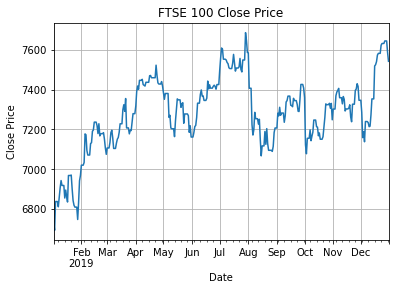

In [57]:
# Plot the closing prices for FTSE 100
ftseTime['Close'].plot(grid = True)

plt.ylabel('Close Price')
plt.title('FTSE 100 Close Price')
plt.show()

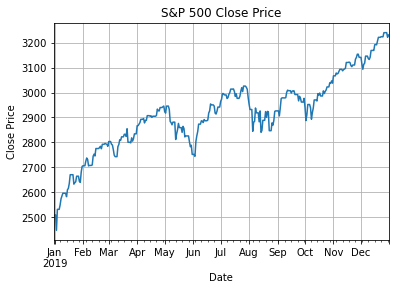

In [58]:
# Plot the closing prices for DJIA
SP500Time['Close'].plot(grid = True)

plt.ylabel('Close Price')
plt.title('S&P 500 Close Price')
plt.show()

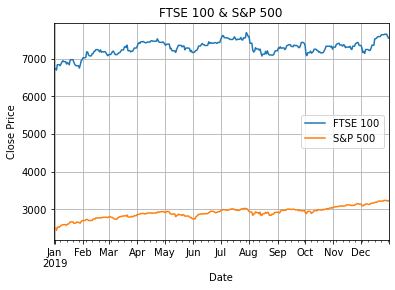

In [59]:
#Plot both FTSE 100 and S&P500 on the same graph
ftseTime['Close'].plot(grid = True, label = "FTSE 100")
SP500Time['Close'].plot(grid = True , label = "S&P 500")

plt.ylabel('Close Price')
plt.title('FTSE 100 & S&P 500')
plt.legend()
plt.show()

In [60]:
print("FTSE 100 reached an all-time high on", ftseNew.max())

FTSE 100 reached an all-time high on Date     2019-12-31 00:00:00
Close                7686.61
dtype: object


In [61]:
print("FTSE 100 reached an all-time low on",ftseNew.min())

FTSE 100 reached an all-time low on Date     2019-01-02 00:00:00
Close                6692.66
dtype: object


In [62]:
print("S&P 500 reached an all-time high on", SP500New.max())

S&P 500 reached an all-time high on Date     2019-12-31 00:00:00
Close                3240.02
dtype: object


In [63]:
print("S&P 500 reached an all-time low on", SP500New.min())

S&P 500 reached an all-time low on Date     2018-12-31 00:00:00
Close                2447.89
dtype: object


### FX Dataset

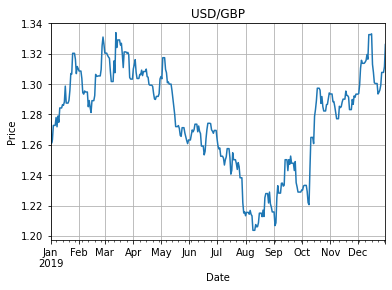

In [64]:
# Plot the closing prices for DJIA
FXUSDTime['Price'].plot(grid = True)

plt.ylabel('Price')
plt.title('USD/GBP')
plt.show()

In [65]:
print("USD/GBP exchange reached an all-time high on", FXUSDNew.max())

USD/GBP exchange reached an all-time high on Date     2019-12-31 00:00:00
Price                 1.3339
dtype: object


In [66]:
print("USD/GBP exchange reached an all-time low on", FXUSDNew.min())

USD/GBP exchange reached an all-time low on Date     2019-01-01 00:00:00
Price                 1.2037
dtype: object


## Feature Engineering

### News Dataset

Features to be applied to the news dataset:
- Number of words in a headline
- Number of characters in a headline
- Day when article is published
- Month when article is published
- Year when article is published
- Sentiment of headline: Positive/Negative/Neutral
- LDA topic analysis

In [67]:
newsarticlesdf2['PublishDate'] = [d.date() for d in newsarticlesdf2['PublicationDate']]
newsarticlesdf2['PublishTime'] = [d.time() for d in newsarticlesdf2['PublicationDate']]
newsarticlesdf2.head()

c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime
0,City braced for bad news over Christmas retail...,"<p>The City is bracing itself, to discover jus...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55+00:00,2019-01-01,17:18:55
1,DRC electoral fraud fears rise as internet shu...,<p>Fears of electoral fraud are rising in the ...,5759,933,2019-01-01T20:10:00Z,The Guardian,2019-01-01T15:58:01Z,2019-01-01 15:58:01+00:00,2019-01-01,15:58:01
2,US chief justice endorses steps to combat hara...,"<p><a href=""https://www.theguardian.com/law/us...",3454,541,2019-01-02T14:49:40Z,theguardian.com,2019-01-01T15:36:03Z,2019-01-01 15:36:03+00:00,2019-01-01,15:36:03
3,"US man detained in Russia is former marine, sa...","<p>The American man who was <a href=""https://w...",3528,607,2019-01-02T14:50:27Z,The Guardian,2019-01-01T13:28:39Z,2019-01-01 13:28:39+00:00,2019-01-01,13:28:39
4,Manchester stabbings: counter-terror police ra...,<p>Counter-terrorism police have raided a hous...,6271,1056,2019-01-01T18:11:40Z,theguardian.com,2019-01-01T13:04:33Z,2019-01-01 13:04:33+00:00,2019-01-01,13:04:33


In [68]:
#Find day of week from the article
newsarticlesdf2['PublishDate'] = pd.to_datetime(newsarticlesdf2['PublishDate'],errors = 'coerce')
newsarticlesdf2['month'] = newsarticlesdf2['PublishDate'].dt.month
newsarticlesdf2['Month full'] = newsarticlesdf2['PublishDate'].dt.strftime('%B')
newsarticlesdf2['year'] = newsarticlesdf2['PublishDate'].dt.year
newsarticlesdf2.head()

c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\shivam dixit\documents\blkhack\impact-of-new

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year
0,City braced for bad news over Christmas retail...,"<p>The City is bracing itself, to discover jus...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55+00:00,2019-01-01,17:18:55,1,January,2019
1,DRC electoral fraud fears rise as internet shu...,<p>Fears of electoral fraud are rising in the ...,5759,933,2019-01-01T20:10:00Z,The Guardian,2019-01-01T15:58:01Z,2019-01-01 15:58:01+00:00,2019-01-01,15:58:01,1,January,2019
2,US chief justice endorses steps to combat hara...,"<p><a href=""https://www.theguardian.com/law/us...",3454,541,2019-01-02T14:49:40Z,theguardian.com,2019-01-01T15:36:03Z,2019-01-01 15:36:03+00:00,2019-01-01,15:36:03,1,January,2019
3,"US man detained in Russia is former marine, sa...","<p>The American man who was <a href=""https://w...",3528,607,2019-01-02T14:50:27Z,The Guardian,2019-01-01T13:28:39Z,2019-01-01 13:28:39+00:00,2019-01-01,13:28:39,1,January,2019
4,Manchester stabbings: counter-terror police ra...,<p>Counter-terrorism police have raided a hous...,6271,1056,2019-01-01T18:11:40Z,theguardian.com,2019-01-01T13:04:33Z,2019-01-01 13:04:33+00:00,2019-01-01,13:04:33,1,January,2019


In [69]:
newsarticlesdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9112 entries, 0 to 9111
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   headline            9112 non-null   object             
 1   body                9112 non-null   object             
 2   charCount           9112 non-null   object             
 3   wordcount           9112 non-null   object             
 4   lastModified        9112 non-null   object             
 5   publication         9112 non-null   object             
 6   webPublicationDate  9112 non-null   object             
 7   PublicationDate     9112 non-null   datetime64[ns, UTC]
 8   PublishDate         9112 non-null   datetime64[ns]     
 9   PublishTime         9112 non-null   object             
 10  month               9112 non-null   int64              
 11  Month full          9112 non-null   object             
 12  year                9112 non-null 

Text(0.5, 1.0, 'Count of number of headlines published per year')

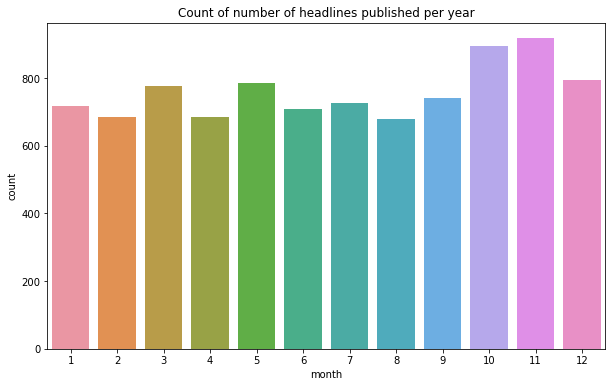

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(newsarticlesdf2['month'])
plt.title('Count of number of headlines published per year')

In [72]:
month = newsarticlesdf2['Month full']
year = newsarticlesdf2['year']

monthbyyear = newsarticlesdf2.groupby([month,year]).size()
monthbyyear = monthbyyear.rename_axis(['Month','Year']).unstack('Month').reindex(columns = order_month)
monthbyyear

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2019,717,685,776,686,786,710,726,679,741,894,918,794


Text(0.5, 1.0, 'Heatmap - count of number of headlines published per month and year')

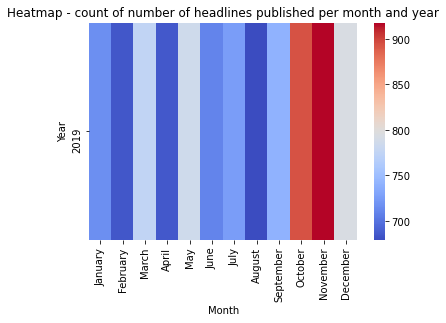

In [73]:
sns.heatmap(monthbyyear,cmap = 'coolwarm')
plt.title('Heatmap - count of number of headlines published per month and year')

<b><u>Comments</u></b>
<br>
There was a spike in the number of articles published in November, potentially due to the cororna pandemic which started taking pace during November.

In [74]:
#Sort the df by publish date and reset the index
newsarticlesdf2.sort_values(by = 'PublishDate',inplace = True)
newsarticlesdf2.reset_index(drop = True, inplace = True)
newsarticlesdf2.head()

c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year
0,City braced for bad news over Christmas retail...,"<p>The City is bracing itself, to discover jus...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55+00:00,2019-01-01,17:18:55,1,January,2019
1,Archbishop of Canterbury urges openness in new...,<p>The archbishop of Canterbury has urged the ...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04+00:00,2019-01-01,00:01:04,1,January,2019
2,Hello 2019 – what are you likely to bring?,"<p>A year is much more than just 365 days, or ...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06+00:00,2019-01-01,02:00:06,1,January,2019
3,Opal Tower: more cracks found on lower level o...,<p>More cracks have been discovered in Sydney’...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30+00:00,2019-01-01,02:17:30,1,January,2019
4,Elizabeth Warren announces 2020 run against Tr...,<p>Senator Elizabeth Warren jumped into the ra...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00+00:00,2019-01-01,02:28:00,1,January,2019


In [75]:
newsarticlesdf2.describe()

,month,year
count,9112.000000,9112.0
mean,6.705224,2019.0
std,3.487536,0.0
min,1.000000,2019.0
25%,4.000000,2019.0
50%,7.000000,2019.0
75%,10.000000,2019.0
max,12.000000,2019.0


In [76]:
#WordCount and Character count from the Guardian API is for the body of the text.
#Create a new column for the character and word count of the headline
newsarticlesdf2['headline_text_count'] = newsarticlesdf2['headline'].apply(lambda x: len(str(x).split(" ")))
newsarticlesdf2['headline_char_count'] = newsarticlesdf2['headline'].str.len()
newsarticlesdf2.head()

c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count
0,City braced for bad news over Christmas retail...,"<p>The City is bracing itself, to discover jus...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55+00:00,2019-01-01,17:18:55,1,January,2019,9,54
1,Archbishop of Canterbury urges openness in new...,<p>The archbishop of Canterbury has urged the ...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04+00:00,2019-01-01,00:01:04,1,January,2019,9,59
2,Hello 2019 – what are you likely to bring?,"<p>A year is much more than just 365 days, or ...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06+00:00,2019-01-01,02:00:06,1,January,2019,9,42
3,Opal Tower: more cracks found on lower level o...,<p>More cracks have been discovered in Sydney’...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30+00:00,2019-01-01,02:17:30,1,January,2019,13,76
4,Elizabeth Warren announces 2020 run against Tr...,<p>Senator Elizabeth Warren jumped into the ra...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00+00:00,2019-01-01,02:28:00,1,January,2019,11,70


In [77]:
newsarticlesdf2.describe()

,month,year,headline_text_count,headline_char_count
count,9112.000000,9112.0,9112.000000,9112.000000
mean,6.705224,2019.0,11.039838,68.250768
std,3.487536,0.0,2.544878,13.152058
min,1.000000,2019.0,3.000000,14.000000
25%,4.000000,2019.0,9.000000,61.000000
50%,7.000000,2019.0,11.000000,67.000000
75%,10.000000,2019.0,12.000000,76.000000
max,12.000000,2019.0,25.000000,140.000000


Text(0.5, 1.0, 'Count of number headlines per word count')

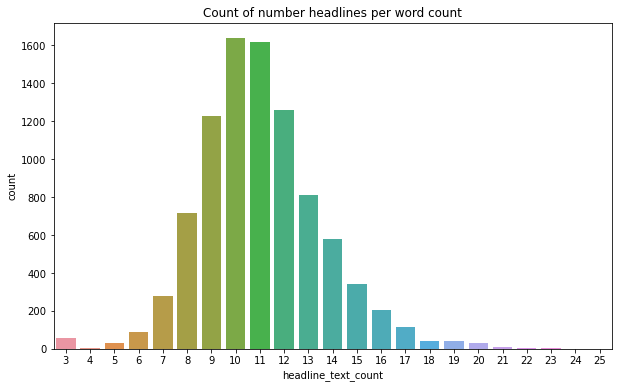

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(newsarticlesdf2['headline_text_count'])
plt.title('Count of number headlines per word count')

Text(0.5, 1.0, 'Count of number of characters in a headline')

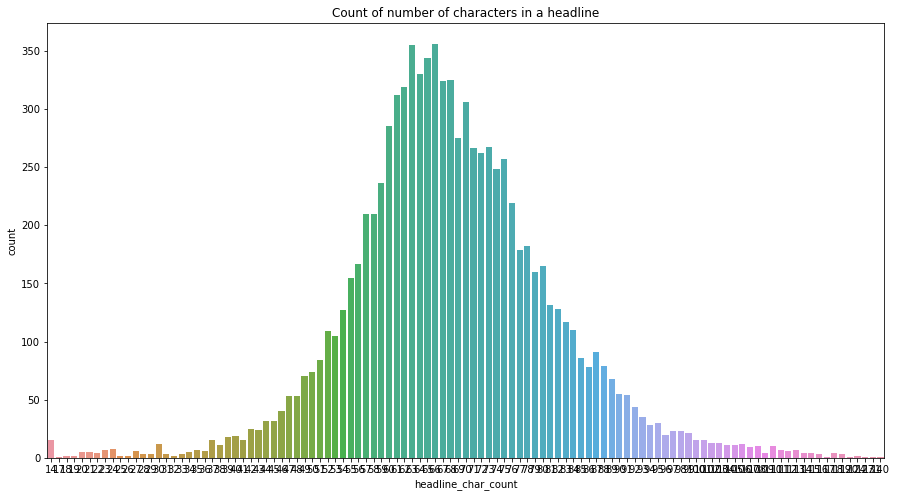

In [79]:
plt.figure(figsize=(15,8))
sns.countplot(newsarticlesdf2['headline_char_count'])
plt.title('Count of number of characters in a headline')

<b><u>Comments</u></b>
<br>
Headlines generally have less words, to grab the readers attention. The average number of words in a headline is 6 words or less, which can be seen in the graphs above [23].

In [80]:
headlines_to_drop = ['Student News:','Newsdesk','in pictures','Picture desk','best photographs','world in pictures','photo highlights','Your photographs of',': 23032007','Student News','Daily Newsdesk','podcast:','StudentNews1:','News quiz:','Helen Boden:','Milling Around','52 weeks:','Underwater photography:','The Illustrated London News','Photo highlights','picture of the day','photo of the day','Eyewitness:','photographer of the year','Video:',' photographs of the day','video:','pictures of the day','Xan Brooks','Activate 2011:','Media Talk:','MediaTalk:','Mediatalk:','Media talk:','In pictures:','365 days:','366 days','The Guardian Essential Report','Mediatalk','MediaTalk','quiz:','tweets:','weekly:','Weekly:','quiz of']
newsarticlesdf3 = newsarticlesdf2[~newsarticlesdf2.headline.str.contains('|'.join(headlines_to_drop))]

In [81]:
newsarticlesdf3.shape

(9107, 15)

<b><u>Comments</u></b>
<br>
Remove the above words listed in headlines_to_drop as these headlines may not have an impact on the stock market. In order to precisely forecast the stock price using the news articles containing photos, image processing could be used to see what photos were released.

In [82]:
#Remove time zone from the datetime column - can't export file where timezones are present - not supported by excel.
newsarticlesdf3['PublicationDate']= newsarticlesdf3['PublicationDate'].dt.tz_localize(None)

c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
newsarticlesdf3.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count
0,City braced for bad news over Christmas retail...,"<p>The City is bracing itself, to discover jus...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,1,January,2019,9,54
1,Archbishop of Canterbury urges openness in new...,<p>The archbishop of Canterbury has urged the ...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04,2019-01-01,00:01:04,1,January,2019,9,59
2,Hello 2019 – what are you likely to bring?,"<p>A year is much more than just 365 days, or ...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,1,January,2019,9,42
3,Opal Tower: more cracks found on lower level o...,<p>More cracks have been discovered in Sydney’...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30,2019-01-01,02:17:30,1,January,2019,13,76
4,Elizabeth Warren announces 2020 run against Tr...,<p>Senator Elizabeth Warren jumped into the ra...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,1,January,2019,11,70


In [84]:
newsarticlesdf4 = newsarticlesdf3
newsarticlesdf4.shape

(9107, 15)

In [85]:
newsarticlesdf4['wordcount'].unique()

array(['696', '574', '2258', ..., '11442', '1837', '4584'], dtype=object)

In [86]:
#newsarticlesdf4.to_excel('newsarticlesdf4.xlsx')

In [87]:
#newsarticlesdf4 = pd.read_excel('newsarticlesdf4.xlsx')

In [88]:
newsarticlesdf4.shape

(9107, 15)

In [89]:
newsarticlesdf4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9107 entries, 0 to 9111
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   headline             9107 non-null   object        
 1   body                 9107 non-null   object        
 2   charCount            9107 non-null   object        
 3   wordcount            9107 non-null   object        
 4   lastModified         9107 non-null   object        
 5   publication          9107 non-null   object        
 6   webPublicationDate   9107 non-null   object        
 7   PublicationDate      9107 non-null   datetime64[ns]
 8   PublishDate          9107 non-null   datetime64[ns]
 9   PublishTime          9107 non-null   object        
 10  month                9107 non-null   int64         
 11  Month full           9107 non-null   object        
 12  year                 9107 non-null   int64         
 13  headline_text_count  9107 non-nul

In [90]:
newsarticlesdf4['headline'] = newsarticlesdf4['headline'].astype('str')
newsarticlesdf4['body']=newsarticlesdf4['body'].astype('str')

c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob
from PIL import Image
from os import path

#### Clean text in body 

In [92]:
#code adapted from Data Science Blog [24]
#remove <br> </br> <p> </p> <b> </b> - html tags which were present in the body
newsarticlesdf4 = newsarticlesdf4.replace('<br>', '',regex = True)
newsarticlesdf4 = newsarticlesdf4.replace('</br>', '',regex = True)
newsarticlesdf4 = newsarticlesdf4.replace('<b>', '',regex = True)
newsarticlesdf4 = newsarticlesdf4.replace('</b>', '',regex = True)
newsarticlesdf4 = newsarticlesdf4.replace('<p>', '',regex = True)
newsarticlesdf4 = newsarticlesdf4.replace('</p>', '',regex = True)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,1,January,2019,9,54
1,Archbishop of Canterbury urges openness in new...,The archbishop of Canterbury has urged the cou...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04,2019-01-01,00:01:04,1,January,2019,9,59
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,1,January,2019,9,42
3,Opal Tower: more cracks found on lower level o...,More cracks have been discovered in Sydney’s O...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30,2019-01-01,02:17:30,1,January,2019,13,76
4,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,1,January,2019,11,70


In [93]:
#Use newsarticlesdf4 which contains headlines and body text
#convert text to lowercase
newsarticlesdf4['headline_clean'] = newsarticlesdf4['headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))
newsarticlesdf4['body_clean'] = newsarticlesdf4['body'].apply(lambda x: " ".join(x.lower() for x in x.split()))
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count,headline_clean,body_clean
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,1,January,2019,9,54,city braced for bad news over christmas retail...,"the city is bracing itself, to discover just h..."
1,Archbishop of Canterbury urges openness in new...,The archbishop of Canterbury has urged the cou...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04,2019-01-01,00:01:04,1,January,2019,9,59,archbishop of canterbury urges openness in new...,the archbishop of canterbury has urged the cou...
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,1,January,2019,9,42,hello 2019 – what are you likely to bring?,"a year is much more than just 365 days, or one..."
3,Opal Tower: more cracks found on lower level o...,More cracks have been discovered in Sydney’s O...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30,2019-01-01,02:17:30,1,January,2019,13,76,opal tower: more cracks found on lower level o...,more cracks have been discovered in sydney’s o...
4,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,1,January,2019,11,70,elizabeth warren announces 2020 run against tr...,senator elizabeth warren jumped into the race ...


In [94]:
#remove special characters from the text
newsarticlesdf4['headline_clean'] = newsarticlesdf4['headline_clean'].str.replace('[^\w\s]','')
newsarticlesdf4['body_clean'] = newsarticlesdf4['body_clean'].str.replace('[^\w\s]','')
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count,headline_clean,body_clean
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,1,January,2019,9,54,city braced for bad news over christmas retail...,the city is bracing itself to discover just ho...
1,Archbishop of Canterbury urges openness in new...,The archbishop of Canterbury has urged the cou...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04,2019-01-01,00:01:04,1,January,2019,9,59,archbishop of canterbury urges openness in new...,the archbishop of canterbury has urged the cou...
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,1,January,2019,9,42,hello 2019 what are you likely to bring,a year is much more than just 365 days or one ...
3,Opal Tower: more cracks found on lower level o...,More cracks have been discovered in Sydney’s O...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30,2019-01-01,02:17:30,1,January,2019,13,76,opal tower more cracks found on lower level of...,more cracks have been discovered in sydneys op...
4,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,1,January,2019,11,70,elizabeth warren announces 2020 run against tr...,senator elizabeth warren jumped into the race ...


In [95]:
#Stopwords - remove stop words
stop = stopwords.words('english') #includes words such as I,my,we
#Extend the stop words to remove the below. These words will appear a lot in the headlines, which means 
#we would not be able to see the more important words in the headlines
stop.extend(['news','new','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','media','photo','photography','bn'])
newsarticlesdf4['headline_clean_stop'] = newsarticlesdf4['headline_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
newsarticlesdf4['body_clean_stop'] = newsarticlesdf4['body_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,month,Month full,year,headline_text_count,headline_char_count,headline_clean,body_clean,headline_clean_stop,body_clean_stop
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,1,January,2019,9,54,city braced for bad news over christmas retail...,the city is bracing itself to discover just ho...,city braced bad christmas retail figures,city bracing discover brutal christmas 2018 uk...
1,Archbishop of Canterbury urges openness in new...,The archbishop of Canterbury has urged the cou...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04,2019-01-01,00:01:04,1,January,2019,9,59,archbishop of canterbury urges openness in new...,the archbishop of canterbury has urged the cou...,archbishop canterbury urges openness year message,archbishop canterbury urged country start 2019...
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,1,January,2019,9,42,hello 2019 what are you likely to bring,a year is much more than just 365 days or one ...,hello 2019 likely bring,year much 365 days one orbit earth around sun ...
3,Opal Tower: more cracks found on lower level o...,More cracks have been discovered in Sydney’s O...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30,2019-01-01,02:17:30,1,January,2019,13,76,opal tower more cracks found on lower level of...,more cracks have been discovered in sydneys op...,opal tower cracks found lower level sydney oly...,cracks discovered sydneys opal tower meaning r...
4,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,1,January,2019,11,70,elizabeth warren announces 2020 run against tr...,senator elizabeth warren jumped into the race ...,elizabeth warren announces 2020 trump im fight,senator elizabeth warren jumped race president...


In [96]:
#Create word cloud
text = " ".join(headlines for headlines in newsarticlesdf4.headline)
print ("There are {} words in the combination of all headlines.".format(len(text)))

There are 630674 words in the combination of all headlines.


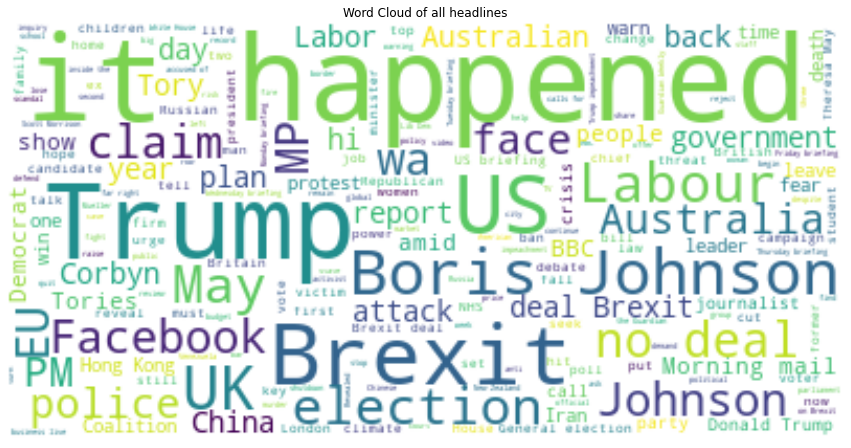

In [97]:
stopwords = ['BBC','say','new','News','media','Today','will','ad','says','news','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','media','photo','photography','bn'] + list(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of all headlines')
plt.show()

The time series plots of the FTSE 100 show four distinct periods, hence investigate the words presents for these periods:
- January - March
- April - June
- July - September
- October - December

In [102]:
newsJan = newsarticlesdf4.loc[(newsarticlesdf4['month']>= 1) &(newsarticlesdf4['month']<= 3)]
newsApr = newsarticlesdf4.loc[(newsarticlesdf4['month']>= 4) &(newsarticlesdf4['month']<= 6)]
newsJul = newsarticlesdf4.loc[(newsarticlesdf4['month']>= 7) &(newsarticlesdf4['month']<= 9)]
newsOct = newsarticlesdf4.loc[(newsarticlesdf4['month']>= 10) &(newsarticlesdf4['month']<= 12)]

In [103]:
#Create word cloud
textJan = " ".join(headlines for headlines in newsJan.headline)
print ("There are {} words in the combination of all headlines from January to March.".format(len(textJan)))

There are 149151 words in the combination of all headlines from January to March.


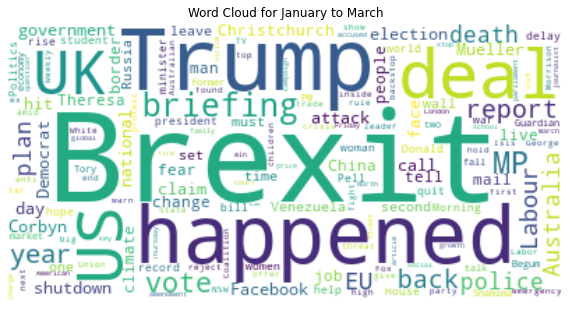

In [104]:
wordcloudJan = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(textJan)

plt.figure(figsize = (10,10))
plt.imshow(wordcloudJan, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for January to March')
plt.show()

In [105]:
#Create word cloud
textApr = " ".join(headlines for headlines in newsApr.headline)
print ("There are {} words in the combination of all headlines from April to June.".format(len(textApr)))

There are 150810 words in the combination of all headlines from April to June.


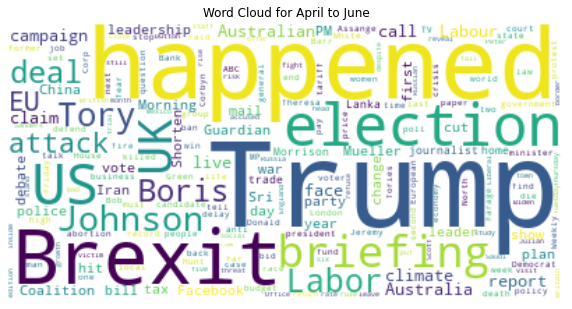

In [106]:
wordcloudApr = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(textApr)

plt.figure(figsize = (10,10))
plt.imshow(wordcloudApr, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for April to June')
plt.show()

In [108]:
#Create word cloud
textJul = " ".join(headlines for headlines in newsJul.headline)
print ("There are {} words in the combination of all headlines from July to September.".format(len(textJul)))

There are 149132 words in the combination of all headlines from July to September.


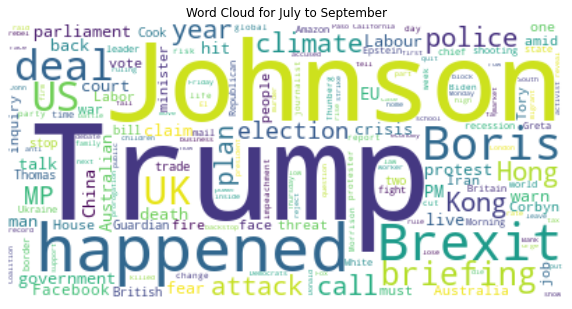

In [109]:
wordcloudJul = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(textJul)

plt.figure(figsize = (10,10))
plt.imshow(wordcloudJul, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for July to September')
plt.show()

In [110]:
#Create word cloud
textOct = " ".join(headlines for headlines in newsOct.headline)
print ("There are {} words in the combination of all headlines from October to December.".format(len(textOct)))

There are 181578 words in the combination of all headlines from October to December.


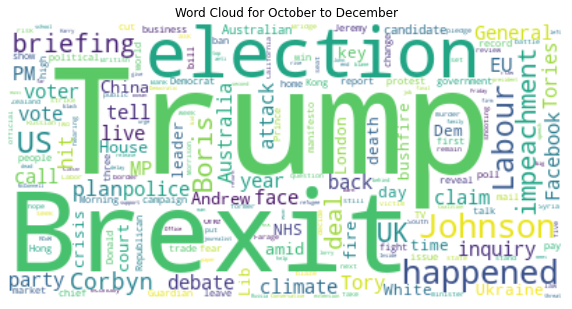

In [111]:
wordcloudOct = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(textOct)

plt.figure(figsize = (10,10))
plt.imshow(wordcloudOct, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for October to December')
plt.show()

<b><u>Comments</u></b>

There are four distinct periods when looking at the stock indices graphs 

- Jan - Mar - Brexit
- Apr - Jun - Trump
- Jul - Sep - Johnson
- Oct to Dec - election 

#### Text Blob

In [112]:

def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
newsarticlesdf4['polarity_headline'] = newsarticlesdf4.headline_clean_stop.apply(detect_polarity)
newsarticlesdf4['polarity_body'] = newsarticlesdf4.body_clean_stop.apply(detect_polarity)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,Month full,year,headline_text_count,headline_char_count,headline_clean,body_clean,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,...,January,2019,9,54,city braced for bad news over christmas retail...,the city is bracing itself to discover just ho...,city braced bad christmas retail figures,city bracing discover brutal christmas 2018 uk...,-0.7,-0.052806
1,Archbishop of Canterbury urges openness in new...,The archbishop of Canterbury has urged the cou...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04,2019-01-01,00:01:04,...,January,2019,9,59,archbishop of canterbury urges openness in new...,the archbishop of canterbury has urged the cou...,archbishop canterbury urges openness year message,archbishop canterbury urged country start 2019...,0.0,-0.014617
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,...,January,2019,9,42,hello 2019 what are you likely to bring,a year is much more than just 365 days or one ...,hello 2019 likely bring,year much 365 days one orbit earth around sun ...,0.0,0.059286
3,Opal Tower: more cracks found on lower level o...,More cracks have been discovered in Sydney’s O...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30,2019-01-01,02:17:30,...,January,2019,13,76,opal tower more cracks found on lower level of...,more cracks have been discovered in sydneys op...,opal tower cracks found lower level sydney oly...,cracks discovered sydneys opal tower meaning r...,0.0,0.115546
4,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,...,January,2019,11,70,elizabeth warren announces 2020 run against tr...,senator elizabeth warren jumped into the race ...,elizabeth warren announces 2020 trump im fight,senator elizabeth warren jumped race president...,0.0,0.104134


In [113]:
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
newsarticlesdf4['subjectivity_headline'] = newsarticlesdf4.headline_clean_stop.apply(detect_subjectivity)
newsarticlesdf4['subjectivity_body'] = newsarticlesdf4.body_clean_stop.apply(detect_subjectivity)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,headline_text_count,headline_char_count,headline_clean,body_clean,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,...,9,54,city braced for bad news over christmas retail...,the city is bracing itself to discover just ho...,city braced bad christmas retail figures,city bracing discover brutal christmas 2018 uk...,-0.7,-0.052806,0.666667,0.303560
1,Archbishop of Canterbury urges openness in new...,The archbishop of Canterbury has urged the cou...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04,2019-01-01,00:01:04,...,9,59,archbishop of canterbury urges openness in new...,the archbishop of canterbury has urged the cou...,archbishop canterbury urges openness year message,archbishop canterbury urged country start 2019...,0.0,-0.014617,0.000000,0.477105
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,...,9,42,hello 2019 what are you likely to bring,a year is much more than just 365 days or one ...,hello 2019 likely bring,year much 365 days one orbit earth around sun ...,0.0,0.059286,1.000000,0.370387
3,Opal Tower: more cracks found on lower level o...,More cracks have been discovered in Sydney’s O...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30,2019-01-01,02:17:30,...,13,76,opal tower more cracks found on lower level of...,more cracks have been discovered in sydneys op...,opal tower cracks found lower level sydney oly...,cracks discovered sydneys opal tower meaning r...,0.0,0.115546,0.000000,0.287465
4,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,...,11,70,elizabeth warren announces 2020 run against tr...,senator elizabeth warren jumped into the race ...,elizabeth warren announces 2020 trump im fight,senator elizabeth warren jumped race president...,0.0,0.104134,0.000000,0.411991


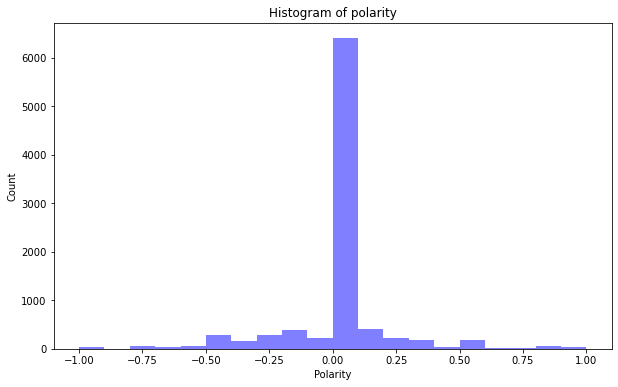

In [114]:
#Distribution of Polarity
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(newsarticlesdf4.polarity_headline, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

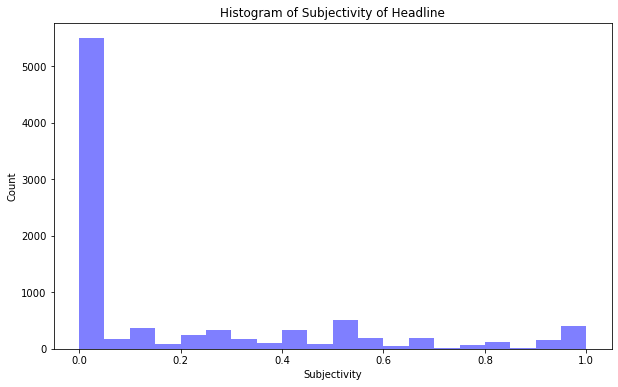

In [115]:
#Distribution of subjectivity headline
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(newsarticlesdf4.subjectivity_headline, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity of Headline')
plt.show();

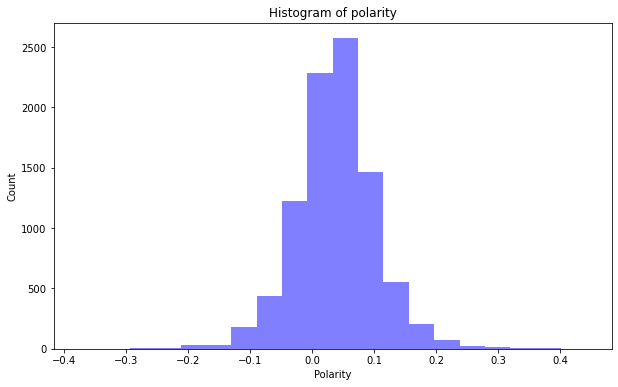

In [116]:
#Distribution of Polarity
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(newsarticlesdf4.polarity_body, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

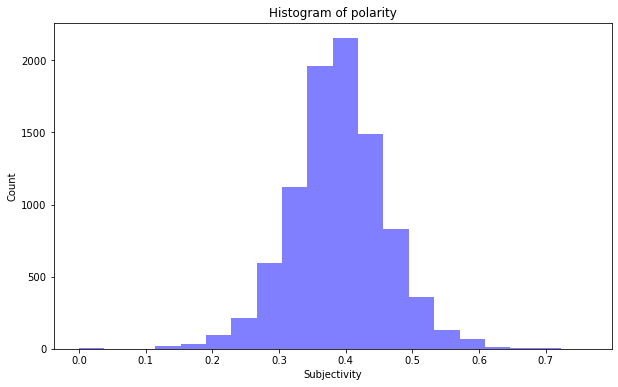

In [117]:
#Distribution of subjectivity of body 
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(newsarticlesdf4.subjectivity_body, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

<b><u>Comments</u></b>
<br>
TextBlob does not show any meaningful results for the sentiment of the headline. A number of articles have been classified as neutral when they should not be. VADER will be used instead to calculate the sentiment of the headline. TextBlob show some results for the sentiment of the body of the article, however due to computational resources, the body of the article is not in the scope of this investigation.

#### VADER

In [118]:
#Import vader package
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [119]:
#apply vader sentiment to output columns neg,pos,neu and compound. Code adapted from [27]
sentiment = newsarticlesdf4['headline'].apply(lambda x: analyzer.polarity_scores(x))
newsarticlesdf4 = pd.concat([newsarticlesdf4,sentiment.apply(pd.Series)],1)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,neg,neu,pos,compound
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,...,city braced bad christmas retail figures,city bracing discover brutal christmas 2018 uk...,-0.7,-0.052806,0.666667,0.303560,0.304,0.696,0.000,-0.5423
1,Archbishop of Canterbury urges openness in new...,The archbishop of Canterbury has urged the cou...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04,2019-01-01,00:01:04,...,archbishop canterbury urges openness year message,archbishop canterbury urged country start 2019...,0.0,-0.014617,0.000000,0.477105,0.000,0.769,0.231,0.3400
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,...,hello 2019 likely bring,year much 365 days one orbit earth around sun ...,0.0,0.059286,1.000000,0.370387,0.000,1.000,0.000,0.0000
3,Opal Tower: more cracks found on lower level o...,More cracks have been discovered in Sydney’s O...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30,2019-01-01,02:17:30,...,opal tower cracks found lower level sydney oly...,cracks discovered sydneys opal tower meaning r...,0.0,0.115546,0.000000,0.287465,0.155,0.845,0.000,-0.2960
4,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,...,elizabeth warren announces 2020 trump im fight,senator elizabeth warren jumped race president...,0.0,0.104134,0.000000,0.411991,0.231,0.769,0.000,-0.4588


In [120]:
#Drop neg neu and pos column from the dataset, only interested in the Compound sentiment analysis score
newsarticlesdf4 = newsarticlesdf4.drop(['neg','neu','pos'],axis = 1)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,headline_char_count,headline_clean,body_clean,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,compound
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,...,54,city braced for bad news over christmas retail...,the city is bracing itself to discover just ho...,city braced bad christmas retail figures,city bracing discover brutal christmas 2018 uk...,-0.7,-0.052806,0.666667,0.303560,-0.5423
1,Archbishop of Canterbury urges openness in new...,The archbishop of Canterbury has urged the cou...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04,2019-01-01,00:01:04,...,59,archbishop of canterbury urges openness in new...,the archbishop of canterbury has urged the cou...,archbishop canterbury urges openness year message,archbishop canterbury urged country start 2019...,0.0,-0.014617,0.000000,0.477105,0.3400
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,...,42,hello 2019 what are you likely to bring,a year is much more than just 365 days or one ...,hello 2019 likely bring,year much 365 days one orbit earth around sun ...,0.0,0.059286,1.000000,0.370387,0.0000
3,Opal Tower: more cracks found on lower level o...,More cracks have been discovered in Sydney’s O...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30,2019-01-01,02:17:30,...,76,opal tower more cracks found on lower level of...,more cracks have been discovered in sydneys op...,opal tower cracks found lower level sydney oly...,cracks discovered sydneys opal tower meaning r...,0.0,0.115546,0.000000,0.287465,-0.2960
4,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,...,70,elizabeth warren announces 2020 run against tr...,senator elizabeth warren jumped into the race ...,elizabeth warren announces 2020 trump im fight,senator elizabeth warren jumped race president...,0.0,0.104134,0.000000,0.411991,-0.4588


In [121]:
#Add column to distinguish if the sentiment is positive,negative or neutral

def sentiment_class(num):
    if num > 0:
        return 'Positive'
    elif num <0:
        return 'Negative'
    else:
        return 'Neutral'

newsarticlesdf4['VaderSentiment'] = newsarticlesdf4['compound'].apply(sentiment_class)

newsarticlesdf4.head(1)

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,headline_clean,body_clean,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,compound,VaderSentiment
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,...,city braced for bad news over christmas retail...,the city is bracing itself to discover just ho...,city braced bad christmas retail figures,city bracing discover brutal christmas 2018 uk...,-0.7,-0.052806,0.666667,0.30356,-0.5423,Negative


##### Q. Are the news headlines predominantly positive, negative or neutral?

Text(0.5, 1.0, 'Number of headlines per year split by VaderSentiment')

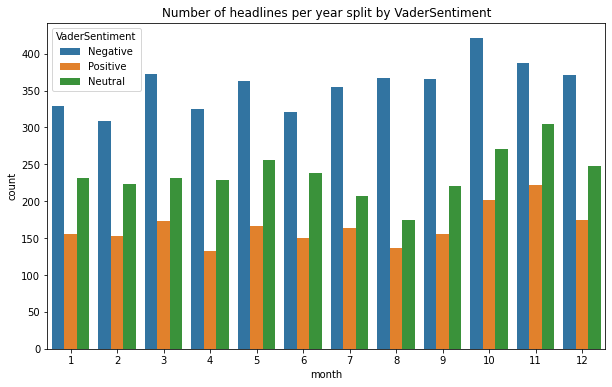

In [123]:
plt.figure(figsize=(10,6))
sns.countplot(newsarticlesdf4['month'],hue = newsarticlesdf4['VaderSentiment'])
plt.title('Number of headlines per year split by VaderSentiment')

In [125]:
#Create a dataset from year 2015 onwards and negative sentiment 
newsOct = newsarticlesdf4.loc[(newsarticlesdf4['month']>= 10) &(newsarticlesdf4['VaderSentiment'] == 'Negative')]
newsOct.shape

(1180, 25)

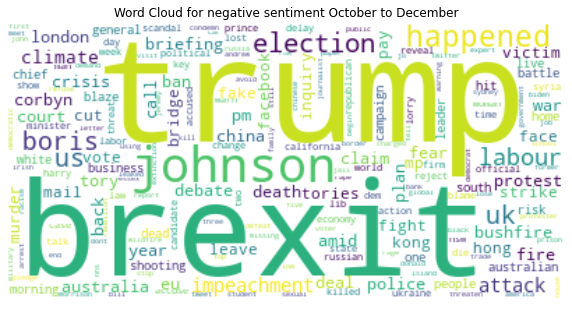

In [128]:
#Create word cloud
textOct = " ".join(headlines for headlines in newsOct.headline_clean_stop)

wordcloudOct = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(textOct)

plt.figure(figsize = (10,10))
plt.imshow(wordcloudOct, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for negative sentiment October to December')
plt.show()

<b><u>Comments</u></b>
<br>
Digging deeper into the increase in negative sentiment headlines for 2015 onwards, the words associated with these headlines are 'fire' ,'attack' ,'labour','death'. There has been an increase in number of pandemics recently as well as Brexit causing uncertainty.

#### Topic Modelling and LDA 

##### Q. Can news headlines be classified into topics reliably?

In [131]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
import spacy

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

[nltk_data] Downloading package wordnet to C:\Users\Shivam
[nltk_data]     Dixit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [132]:
#stem words to the root of each word e.g. publishes becomes publish. Code adapted from StackOverFlor [29]

def stem_word(text):
    tokens = text.split()
    stemmed_tokens = [PorterStemmer().stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

newsarticlesdf4['headline_clean_stop_stem'] = newsarticlesdf4['headline_clean_stop'].apply(stem_word)
newsarticlesdf4.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,body_clean,headline_clean_stop,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,compound,VaderSentiment,headline_clean_stop_stem
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,...,the city is bracing itself to discover just ho...,city braced bad christmas retail figures,city bracing discover brutal christmas 2018 uk...,-0.7,-0.052806,0.666667,0.303560,-0.5423,Negative,citi brace bad christma retail figur
1,Archbishop of Canterbury urges openness in new...,The archbishop of Canterbury has urged the cou...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04,2019-01-01,00:01:04,...,the archbishop of canterbury has urged the cou...,archbishop canterbury urges openness year message,archbishop canterbury urged country start 2019...,0.0,-0.014617,0.000000,0.477105,0.3400,Positive,archbishop canterburi urg open year messag
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,...,a year is much more than just 365 days or one ...,hello 2019 likely bring,year much 365 days one orbit earth around sun ...,0.0,0.059286,1.000000,0.370387,0.0000,Neutral,hello 2019 like bring
3,Opal Tower: more cracks found on lower level o...,More cracks have been discovered in Sydney’s O...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30,2019-01-01,02:17:30,...,more cracks have been discovered in sydneys op...,opal tower cracks found lower level sydney oly...,cracks discovered sydneys opal tower meaning r...,0.0,0.115546,0.000000,0.287465,-0.2960,Negative,opal tower crack found lower level sydney olym...
4,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,...,senator elizabeth warren jumped into the race ...,elizabeth warren announces 2020 trump im fight,senator elizabeth warren jumped race president...,0.0,0.104134,0.000000,0.411991,-0.4588,Negative,elizabeth warren announc 2020 trump im fight


In [133]:
#Column headline_clean_stop excludes stopwords and punctuation
#Create list of headline clean text

headline_text = newsarticlesdf4.headline_clean_stop_stem.values.tolist()
print(headline_text[:1])

['citi brace bad christma retail figur']


In [134]:
#Code for LDA modelling has been adapted from DataSkunkWorks [30] and Machine Learning Plus [32]
#Tokenize words which is required by LDA 
def doc_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),deacc = True))

headlinewords = list(doc_words(headline_text))

print(headlinewords[:1])

[['citi', 'brace', 'bad', 'christma', 'retail', 'figur']]


In [135]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(headlinewords)
 
# Create Corpus
corpus = [id2word.doc2bow(text) for text in headlinewords]
 
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           per_word_topics=True)



In [136]:
# Compute Perplexity score
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=headlinewords, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.406531907596039

Coherence Score:  0.3242933704546606


In [137]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"happen" + 0.008*"climat" + 0.008*"trump" + 0.007*"say" + 0.007*"us" '
  '+ 0.006*"bushfir" + 0.006*"facebook" + 0.006*"attack" + 0.006*"australian" '
  '+ 0.006*"crisi"'),
 (1,
  '0.020*"trump" + 0.014*"happen" + 0.008*"labour" + 0.007*"say" + 0.007*"us" '
  '+ 0.007*"back" + 0.006*"brief" + 0.005*"brexit" + 0.004*"hous" + '
  '0.004*"corbyn"'),
 (2,
  '0.026*"brexit" + 0.017*"johnson" + 0.010*"bori" + 0.010*"uk" + '
  '0.009*"labour" + 0.009*"happen" + 0.008*"brief" + 0.008*"say" + '
  '0.007*"deal" + 0.007*"tori"'),
 (3,
  '0.019*"elect" + 0.016*"johnson" + 0.014*"impeach" + 0.014*"trump" + '
  '0.010*"bori" + 0.007*"labour" + 0.007*"plan" + 0.006*"tori" + '
  '0.006*"happen" + 0.006*"say"')]


In [138]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.149794  0.042752       1        1  27.068319
3      0.029485 -0.138129       2        1  25.808638
0     -0.133024 -0.023975       3        1  23.728825
1     -0.046254  0.119352       4        1  23.394218, topic_info=          Term        Freq       Total Category  logprob  loglift
1451   johnson  615.000000  615.000000  Default  30.0000  30.0000
1984   impeach  267.000000  267.000000  Default  29.0000  29.0000
223     brexit  674.000000  674.000000  Default  28.0000  28.0000
1450      bori  381.000000  381.000000  Default  27.0000  27.0000
29       trump  761.000000  761.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
579         mp   51.207233  155.559723   Topic4  -5.7608   0.3415
61     protest   49.379368  133.838638   Topic4  -5.7972   0.4556
1261    attack   52.088924  209.106415   Topic4  -5.7438   0.0628
95    democrat   49.193226  133.603088   Topic4  -5.8009   0.4536
131      elect   53.871441  568.327820   Topic4  -5.7101  -0.9034

[314 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2859      4  0.946030   accept
2211      3  0.929882  account
2211      4  0.044280  account
286       1  0.008722    accus
286       2  0.479727    accus
...     ...       ...      ...
11        4  0.182129     year
899       1  0.063485  zealand
899       3  0.158712  zealand
899       4  0.777690  zealand
5216      3  0.946882     zero

[546 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

<b><u>Comments</u></b>

From the visualisation above we see that even when setting the number of topics to 4. In addition, the coherence score of the model is quite low, indicating that this model may not be optimal. 
<br>
<b><u>Note</u></b>
<br>
As this is an unsupervised algorithm the topic classifcations change each time. 

In [139]:
# Find the optimal number of topics for LDA using gensim
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [140]:
#Find optimal number of topics - TAKES LONG TO RUN
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=headlinewords, start=2, limit=60, step=6)

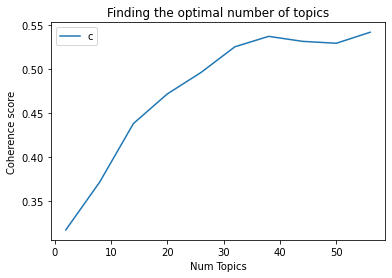

In [141]:
#Show graph
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Finding the optimal number of topics')
plt.show()

In [142]:
# Print the coherence scores
for y, cv in zip(x, coherence_values):
    print("Num Topics =", y, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3177
Num Topics = 8  has Coherence Value of 0.3719
Num Topics = 14  has Coherence Value of 0.4384
Num Topics = 20  has Coherence Value of 0.472
Num Topics = 26  has Coherence Value of 0.4964
Num Topics = 32  has Coherence Value of 0.5255
Num Topics = 38  has Coherence Value of 0.5374
Num Topics = 44  has Coherence Value of 0.5317
Num Topics = 50  has Coherence Value of 0.5295
Num Topics = 56  has Coherence Value of 0.542


<b><u>Comments</u></b>
<br>
Coherence allows us to judge how good the topic model is. From the graph above, the coherence score is at its highest at 50 topics. We will change the LDA topic number to 50 below and visualize them.

In [143]:
id2word = corpora.Dictionary(headlinewords)
 
#Create Corpus
corpus = [id2word.doc2bow(text) for text in headlinewords]
 
#Build LDA model
lda_model_optimise = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                          id2word=id2word,
                                          num_topics=50, 
                                          per_word_topics=True)

In [144]:
from pprint import pprint
pprint(lda_model_optimise.print_topics())
doc_lda_optimise = lda_model_optimise[corpus]

[(0,
  '0.040*"victori" + 0.034*"risk" + 0.032*"brexit" + 0.030*"lost" + '
  '0.030*"doctor" + 0.024*"spark" + 0.023*"economi" + 0.023*"water" + '
  '0.020*"crisi" + 0.019*"decemb"'),
 (1,
  '0.049*"busi" + 0.041*"hit" + 0.039*"key" + 0.038*"high" + 0.032*"live" + '
  '0.029*"expert" + 0.029*"leak" + 0.027*"arrest" + 0.025*"view" + '
  '0.024*"biden"'),
 (34,
  '0.045*"reveal" + 0.044*"parti" + 0.025*"jail" + 0.025*"press" + '
  '0.023*"remark" + 0.023*"suffer" + 0.022*"warn" + 0.022*"young" + '
  '0.021*"abus" + 0.021*"climat"'),
 (3,
  '0.039*"face" + 0.034*"reader" + 0.031*"push" + 0.023*"giant" + '
  '0.022*"polit" + 0.020*"tax" + 0.019*"speak" + 0.018*"video" + 0.018*"left" '
  '+ 0.017*"live"'),
 (19,
  '0.103*"johnson" + 0.061*"bori" + 0.048*"pm" + 0.043*"brexit" + 0.028*"say" '
  '+ 0.026*"happen" + 0.026*"deal" + 0.022*"issu" + 0.020*"eu" + 0.019*"plan"'),
 (20,
  '0.057*"voter" + 0.039*"elect" + 0.034*"morrison" + 0.030*"fight" + '
  '0.028*"scott" + 0.028*"decid" + 0.026*"de

In [145]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_optimise, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11     0.228054 -0.098830       1        1  3.167868
19     0.206205  0.152513       2        1  2.919316
4     -0.035985  0.072459       3        1  2.804444
30     0.190609 -0.093622       4        1  2.677210
33     0.144313  0.306399       5        1  2.417535
28    -0.014025 -0.008182       6        1  2.399084
2     -0.096477  0.090138       7        1  2.354970
26     0.005229 -0.023548       8        1  2.342139
1     -0.031570 -0.025334       9        1  2.269058
14    -0.069975  0.041618      10        1  2.209188
47    -0.054970  0.022218      11        1  2.195711
10     0.108795 -0.052170      12        1  2.194906
7     -0.059348 -0.045045      13        1  2.163233
20    -0.019449  0.009365      14        1  2.147923
36     0.070655 -0.007068      15        1  2.135251
39    -0.019419  0.060099      16        1  2.079850
18    -0.049150  0.003856      17        1  2.063185
6      0.044434 -0.041452      18        1  2.058953
8     -0.117867  0.022959      19        1  2.057984
45    -0.078504 -0.030457      20        1  1.968768
3     -0.046039 -0.011507      21        1  1.960245
17     0.032345  0.019892      22        1  1.954858
40    -0.076943 -0.046042      23        1  1.952602
23    -0.084590  0.062560      24        1  1.933709
38     0.007096 -0.057163      25        1  1.918334
29    -0.018898  0.038516      26        1  1.911116
5      0.003712  0.001357      27        1  1.889834
24    -0.001883  0.010542      28        1  1.860936
34    -0.071391 -0.028558      29        1  1.854455
32    -0.101658 -0.054342      30        1  1.851247
35     0.025543 -0.014354      31        1  1.840944
31    -0.059615 -0.014474      32        1  1.814944
15     0.101176 -0.066218      33        1  1.810027
9     -0.055645  0.051010      34        1  1.792611
16     0.110578 -0.045917      35        1  1.785355
49    -0.018353 -0.035326      36        1  1.758277
22     0.009847 -0.059534      37        1  1.755087
25    -0.061603  0.038711      38        1  1.746365
27    -0.008176  0.019276      39        1  1.745831
43     0.045148  0.149994      40        1  1.736599
41    -0.068773  0.034788      41        1  1.731212
0      0.014996 -0.068836      42        1  1.722604
48     0.011645 -0.088314      43        1  1.720554
12    -0.054770 -0.044271      44        1  1.711957
37     0.064408 -0.047041      45        1  1.680497
42     0.005807 -0.009524      46        1  1.674492
13    -0.026638 -0.029533      47        1  1.649950
46    -0.018178 -0.022278      48        1  1.610643
21    -0.046861  0.049459      49        1  1.569336
44     0.036158 -0.088792      50        1  1.428818, topic_info=           Term        Freq       Total Category  logprob  loglift
1451    johnson  634.000000  634.000000  Default  30.0000  30.0000
1450       bori  391.000000  391.000000  Default  29.0000  29.0000
1984    impeach  294.000000  294.000000  Default  28.0000  28.0000
519      labour  484.000000  484.000000  Default  27.0000  27.0000
225      corbyn  288.000000  288.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
730        live   11.693994  201.000305  Topic50  -4.4420   1.4041
579          mp    9.926577  172.702316  Topic50  -4.6059   1.3920
973   australia    9.786126  191.991608  Topic50  -4.6201   1.2718
419          pm    8.378787  181.750946  Topic50  -4.7754   1.1714
1170     reveal    7.672544  123.613388  Topic50  -4.8634   1.4688

[2446 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
204      13  0.089709  abandon
204      33  0.762524  abandon
204      37  0.044854  abandon
1598      3  0.640229   abbott
1598     27  0.071137   abbott
...     ...       ...      ...
899      14  0.165934  zealand
899      19  0.124451  zealand
899      26  0.013828  zealand
899      43  0.483

<b><u>Comments</u></b>
<br>
38 topics shows the highest coherent score which shows the model is optimal. However, when applying 38 topics nearly all topics overlap. Looking at the four topics generated we can't easily give them a label, hence we can't generate topics reliably. Classifying topics for different years may yield better results.

In [146]:
model_list = lda_model.print_topics()
model_list

[(0,
  '0.015*"happen" + 0.008*"climat" + 0.008*"trump" + 0.007*"say" + 0.007*"us" + 0.006*"bushfir" + 0.006*"facebook" + 0.006*"attack" + 0.006*"australian" + 0.006*"crisi"'),
 (1,
  '0.020*"trump" + 0.014*"happen" + 0.008*"labour" + 0.007*"say" + 0.007*"us" + 0.007*"back" + 0.006*"brief" + 0.005*"brexit" + 0.004*"hous" + 0.004*"corbyn"'),
 (2,
  '0.026*"brexit" + 0.017*"johnson" + 0.010*"bori" + 0.010*"uk" + 0.009*"labour" + 0.009*"happen" + 0.008*"brief" + 0.008*"say" + 0.007*"deal" + 0.007*"tori"'),
 (3,
  '0.019*"elect" + 0.016*"johnson" + 0.014*"impeach" + 0.014*"trump" + 0.010*"bori" + 0.007*"labour" + 0.007*"plan" + 0.006*"tori" + 0.006*"happen" + 0.006*"say"')]

In [147]:
lda_model.show_topic(1)

[('trump', 0.019904463),
 ('happen', 0.013715348),
 ('labour', 0.0076707047),
 ('say', 0.0073821303),
 ('us', 0.007177452),
 ('back', 0.006715291),
 ('brief', 0.006031719),
 ('brexit', 0.0054356027),
 ('hous', 0.0040661152),
 ('corbyn', 0.003961926)]

In [148]:
lda_model[corpus]

In [149]:
lda_model[corpus[1]]

([(0, 0.03664952), (1, 0.7630246), (2, 0.15913261), (3, 0.041193288)],
 [(6, [1, 3]), (7, [1, 3]), (8, [2, 1]), (9, [1]), (10, [1, 2]), (11, [1, 2])],
 [(6, [(1, 0.9656361), (3, 0.013010094)]),
  (7, [(1, 0.97021425), (3, 0.019354366)]),
  (8, [(1, 0.36569026), (2, 0.6333123)]),
  (9, [(1, 0.99900454)]),
  (10, [(1, 0.93045074), (2, 0.06931114)]),
  (11, [(1, 0.84581137), (2, 0.14397037)])])

In [150]:
test_topics = lda_model.get_document_topics(corpus[0])
test_topics

[(0, 0.6175283), (1, 0.0370368), (2, 0.30472147), (3, 0.04071338)]

In [151]:
test_topics_max = max(test_topics, key=lambda x: x[1])
test_topics_max

(0, 0.6175283)

In [152]:
test_topics2 = pd.DataFrame(list(test_topics_max))

In [153]:
test_topics2 = test_topics2.transpose()


In [154]:
test_topics2.columns=['Topic','Percentage']
test_topics2

,Topic,Percentage
0,0.0,0.617528


In [155]:
#Get the topics and their percentage contribution for the headline
get_document_topics = [lda_model.get_document_topics(item) for item in corpus]

In [156]:
document_topics_df = pd.DataFrame(list(get_document_topics))
document_topics_df.head()

,0,1,2,3
0,"(0, 0.617406)","(1, 0.037036613)","(2, 0.30484423)","(3, 0.040713124)"
1,"(0, 0.03664953)","(1, 0.76295483)","(2, 0.15919167)","(3, 0.041203957)"
2,"(0, 0.063522935)","(1, 0.064125374)","(2, 0.80686307)","(3, 0.06548863)"
3,"(0, 0.92657334)","(1, 0.025637154)","(2, 0.024683889)","(3, 0.023105578)"
4,"(0, 0.03864644)","(1, 0.041948345)","(2, 0.8796887)","(3, 0.039716493)"


In [157]:
document_topics_df.shape

(9107, 4)

In [158]:
#Find the maximum percentage contribution for the row to identify the dominant topic
test_max = [max(p,key=lambda x: x[1]) for p in get_document_topics]
test_max

[(0, 0.617406),
 (1, 0.76295483),
 (2, 0.80686307),
 (0, 0.92657334),
 (2, 0.8796887),
 (0, 0.89888746),
 (1, 0.8976515),
 (0, 0.881435),
 (2, 0.79443115),
 (1, 0.90392077),
 (3, 0.5139883),
 (0, 0.91245306),
 (2, 0.6214582),
 (2, 0.9089836),
 (2, 0.6933173),
 (1, 0.7407701),
 (2, 0.79748225),
 (0, 0.8024094),
 (0, 0.9034479),
 (3, 0.8881709),
 (0, 0.8735788),
 (3, 0.89717674),
 (1, 0.87223625),
 (2, 0.88904357),
 (1, 0.9090312),
 (3, 0.5448445),
 (1, 0.59595394),
 (2, 0.64668006),
 (2, 0.66612643),
 (2, 0.90479845),
 (2, 0.47590828),
 (2, 0.5153522),
 (0, 0.7928993),
 (2, 0.41138947),
 (2, 0.86945856),
 (2, 0.564953),
 (2, 0.6636937),
 (3, 0.923167),
 (0, 0.47753218),
 (3, 0.888729),
 (0, 0.9091002),
 (1, 0.6520827),
 (3, 0.6169456),
 (0, 0.8694411),
 (2, 0.6067599),
 (1, 0.6760061),
 (0, 0.90284127),
 (0, 0.90303016),
 (2, 0.9134766),
 (0, 0.60540146),
 (1, 0.92290586),
 (1, 0.57239735),
 (0, 0.75734353),
 (0, 0.90432405),
 (2, 0.8741155),
 (2, 0.91331714),
 (1, 0.7534432),
 (0, 0.90

In [159]:
#Apply the above to a dataframe and rename the columns to topic and percentage contribution
doc_topics = pd.DataFrame(test_max)
doc_topics.columns = ['Topic','Percentage_Contribution']
doc_topics

,Topic,Percentage_Contribution
0,0,0.617406
1,1,0.762955
2,2,0.806863
3,0,0.926573
4,2,0.879689
...,...,...
9102,3,0.655137
9103,0,0.620019
9104,0,0.522969
9105,0,0.888646


In [160]:
#Join back to original df newsarticlesdf4

newsarticlesdf5 = newsarticlesdf4.merge(doc_topics,left_index = True, right_index = True)
newsarticlesdf5.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,body_clean_stop,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,compound,VaderSentiment,headline_clean_stop_stem,Topic,Percentage_Contribution
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,...,city bracing discover brutal christmas 2018 uk...,-0.7,-0.052806,0.666667,0.303560,-0.5423,Negative,citi brace bad christma retail figur,0,0.617406
1,Archbishop of Canterbury urges openness in new...,The archbishop of Canterbury has urged the cou...,3456,574,2020-02-03T12:00:24Z,The Guardian,2019-01-01T00:01:04Z,2019-01-01 00:01:04,2019-01-01,00:01:04,...,archbishop canterbury urged country start 2019...,0.0,-0.014617,0.000000,0.477105,0.3400,Positive,archbishop canterburi urg open year messag,1,0.762955
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,...,year much 365 days one orbit earth around sun ...,0.0,0.059286,1.000000,0.370387,0.0000,Neutral,hello 2019 like bring,2,0.806863
3,Opal Tower: more cracks found on lower level o...,More cracks have been discovered in Sydney’s O...,2056,351,2019-01-01T02:17:30Z,theguardian.com,2019-01-01T02:17:30Z,2019-01-01 02:17:30,2019-01-01,02:17:30,...,cracks discovered sydneys opal tower meaning r...,0.0,0.115546,0.000000,0.287465,-0.2960,Negative,opal tower crack found lower level sydney olym...,0,0.926573
4,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,...,senator elizabeth warren jumped race president...,0.0,0.104134,0.000000,0.411991,-0.4588,Negative,elizabeth warren announc 2020 trump im fight,2,0.879689


In [161]:
#Output the words associated with each topic
x = lda_model.show_topics()

nwords = {}
for topic,word in x:
    nwords[topic] = re.sub('[^A-Za-z ]+','',word)

nwords

{0: 'happen  climat  trump  say  us  bushfir  facebook  attack  australian  crisi',
 1: 'trump  happen  labour  say  us  back  brief  brexit  hous  corbyn',
 2: 'brexit  johnson  bori  uk  labour  happen  brief  say  deal  tori',
 3: 'elect  johnson  impeach  trump  bori  labour  plan  tori  happen  say'}

In [162]:
#Apply above to a df to join to newsarticlesdf5
topic_words = pd.DataFrame(list(nwords.items()),columns=['Topic', 'Topic_Words'])
topic_words

,Topic,Topic_Words
0,0,happen climat trump say us bushfir faceb...
1,1,trump happen labour say us back brief b...
2,2,brexit johnson bori uk labour happen bri...
3,3,elect johnson impeach trump bori labour ...


In [163]:
#Join to newsarticlesdf5 to get topic words and sort by PublishDate

newsarticlesdf6 = pd.merge(newsarticlesdf5,topic_words,left_on = 'Topic', right_on = 'Topic')
newsarticlesdf6.sort_values(by=['PublishDate'], inplace=True)
newsarticlesdf6.reset_index(drop = True, inplace = True)
newsarticlesdf6.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,polarity_headline,polarity_body,subjectivity_headline,subjectivity_body,compound,VaderSentiment,headline_clean_stop_stem,Topic,Percentage_Contribution,Topic_Words
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,...,-0.70,-0.052806,0.666667,0.303560,-0.5423,Negative,citi brace bad christma retail figur,0,0.617406,happen climat trump say us bushfir faceb...
1,Emmanuel Macron vows to push on with reforms d...,"The French president, <a href=""https://www.the...",5925,1004,2019-03-20T14:39:44Z,theguardian.com,2019-01-01T10:40:20Z,2019-01-01 10:40:20,2019-01-01,10:40:20,...,0.00,-0.026243,0.000000,0.450877,0.1695,Positive,emmanuel macron vow push reform despit protest,1,0.903921,trump happen labour say us back brief b...
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,...,0.00,0.059286,1.000000,0.370387,0.0000,Neutral,hello 2019 like bring,2,0.806863,brexit johnson bori uk labour happen bri...
3,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,...,0.00,0.104134,0.000000,0.411991,-0.4588,Negative,elizabeth warren announc 2020 trump im fight,2,0.879689,brexit johnson bori uk labour happen bri...
4,'Victor Hugo becomes a sex god in my mind' – h...,I used to think I was pretty great at French: ...,12211,2105,2019-01-07T13:29:20Z,The Guardian,2019-01-01T08:00:14Z,2019-01-01 08:00:14,2019-01-01,08:00:14,...,0.25,0.047982,0.250000,0.424960,0.6124,Positive,victor hugo becom sex god mind better french,2,0.794431,brexit johnson bori uk labour happen bri...


In [164]:
newsarticlesdf6.shape

(9102, 29)

In [165]:
#Run Vader on topic words

topic_sentiment = newsarticlesdf6['Topic_Words'].apply(lambda x: analyzer.polarity_scores(x))
newsarticlesdf7 = pd.concat([newsarticlesdf6,topic_sentiment.apply(pd.Series)],1)
newsarticlesdf7.head()

,headline,body,charCount,wordcount,lastModified,publication,webPublicationDate,PublicationDate,PublishDate,PublishTime,...,compound,VaderSentiment,headline_clean_stop_stem,Topic,Percentage_Contribution,Topic_Words,neg,neu,pos,compound
0,City braced for bad news over Christmas retail...,"The City is bracing itself, to discover just h...",4054,696,2019-01-01T18:55:01Z,The Guardian,2019-01-01T17:18:55Z,2019-01-01 17:18:55,2019-01-01,17:18:55,...,-0.5423,Negative,citi brace bad christma retail figur,0,0.617406,happen climat trump say us bushfir faceb...,0.256,0.744,0.0,-0.4767
1,Emmanuel Macron vows to push on with reforms d...,"The French president, <a href=""https://www.the...",5925,1004,2019-03-20T14:39:44Z,theguardian.com,2019-01-01T10:40:20Z,2019-01-01 10:40:20,2019-01-01,10:40:20,...,0.1695,Positive,emmanuel macron vow push reform despit protest,1,0.903921,trump happen labour say us back brief b...,0.000,1.000,0.0,0.0000
2,Hello 2019 – what are you likely to bring?,"A year is much more than just 365 days, or one...",13393,2258,2019-01-01T17:59:00Z,theguardian.com,2019-01-01T02:00:06Z,2019-01-01 02:00:06,2019-01-01,02:00:06,...,0.0000,Neutral,hello 2019 like bring,2,0.806863,brexit johnson bori uk labour happen bri...,0.000,1.000,0.0,0.0000
3,Elizabeth Warren announces 2020 run against Tr...,Senator Elizabeth Warren jumped into the race ...,5527,935,2020-02-26T17:57:26Z,The Guardian,2019-01-01T02:28:00Z,2019-01-01 02:28:00,2019-01-01,02:28:00,...,-0.4588,Negative,elizabeth warren announc 2020 trump im fight,2,0.879689,brexit johnson bori uk labour happen bri...,0.000,1.000,0.0,0.0000
4,'Victor Hugo becomes a sex god in my mind' – h...,I used to think I was pretty great at French: ...,12211,2105,2019-01-07T13:29:20Z,The Guardian,2019-01-01T08:00:14Z,2019-01-01 08:00:14,2019-01-01,08:00:14,...,0.6124,Positive,victor hugo becom sex god mind better french,2,0.794431,brexit johnson bori uk labour happen bri...,0.000,1.000,0.0,0.0000


In [166]:
newsarticlesdf7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9102 entries, 0 to 9101
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   headline                  9102 non-null   object        
 1   body                      9102 non-null   object        
 2   charCount                 9102 non-null   object        
 3   wordcount                 9102 non-null   object        
 4   lastModified              9102 non-null   object        
 5   publication               9102 non-null   object        
 6   webPublicationDate        9102 non-null   object        
 7   PublicationDate           9102 non-null   datetime64[ns]
 8   PublishDate               9102 non-null   datetime64[ns]
 9   PublishTime               9102 non-null   object        
 10  month                     9102 non-null   int64         
 11  Month full                9102 non-null   object        
 12  year                

In [167]:
newsarticlesdf8 = newsarticlesdf7[['PublishDate','compound']]
newsarticlesdf8.columns = ['PublishDate','HeadlineCompound','TopicCompound']
newsarticlesdf8.reset_index()
newsarticlesdf8.head(20)

,PublishDate,HeadlineCompound,TopicCompound
0,2019-01-01,-0.5423,-0.4767
1,2019-01-01,0.1695,0.0000
2,2019-01-01,0.0000,0.0000
3,2019-01-01,-0.4588,0.0000
4,2019-01-01,0.6124,0.0000
5,2019-01-01,-0.0258,0.0000
6,2019-01-01,-0.7650,0.0000
7,2019-01-01,-0.3400,0.0000
8,2019-01-01,0.0000,0.0000
9,2019-01-01,0.0000,0.0000


In [168]:
newsarticlesdf9 = newsarticlesdf8.groupby('PublishDate').mean()
newsarticlesdf9.head()

,HeadlineCompound,TopicCompound
PublishDate,,
2019-01-01,-0.136527,-0.158900
2019-01-02,-0.196833,-0.095340
2019-01-03,-0.272550,-0.158900
2019-01-04,-0.094077,-0.151677
2019-01-05,-0.098175,-0.079450


### Stock market data

Features to be added to the stock market data
- Change exchange rate of S&P 500 index from USD to GBP
- EWMA - Exponential Weighted Moving Average
- Trading Strategy


In [171]:
#Join the ASX200 dataset and FXAud dataset in order to apply conversion to the S&P/ASX200 price to USD.

SP500Conversion  = pd.merge(SP500Time,FXUSDTime, on = 'Date')
SP500Conversion.columns = ['SP500_Close_USD','USD_Price','Chg%','Change %']
SP500Conversion['SP500_Close_GBP'] = SP500Conversion['SP500_Close_USD'] * SP500Conversion['USD_Price']
SP500Conversion.drop(labels = ['Chg%'], axis = 'columns', inplace = True)
SP500Conversion.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP
Date,,,,
2019-01-01,2506.850098,1.2752,-0.05%,3196.735245
2019-01-02,2510.030029,1.2610,-1.11%,3165.147867
2019-01-03,2447.889893,1.2633,0.18%,3092.419301
2019-01-04,2531.939941,1.2728,0.75%,3222.653157
2019-01-05,2531.939941,1.2728,NaN,3222.653157


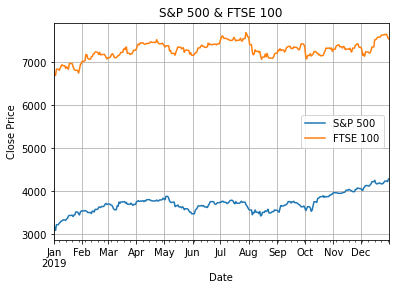

In [172]:
SP500Conversion['SP500_Close_GBP'].plot(grid = True, label = "S&P 500")
ftseTime['Close'].plot(grid = True , label = "FTSE 100")

plt.ylabel('Close Price')
plt.title('S&P 500 & FTSE 100')
plt.legend()
plt.show()

In [173]:
#Exponential Weighted Moving Average using 253 days, indicating an exponentially weight moving average over a year.
#The average number of trading days per calendar year is 253 days [33]
ftseTime['EWMA'] = ftseTime['Close'].ewm(span=253).mean()
ftseTime.head()

,Close,EWMA
Date,,
2019-01-02,6734.23,6734.230000
2019-01-03,6692.66,6713.362846
2019-01-04,6837.42,6755.042556
2019-01-05,6837.42,6775.881760
2019-01-06,6837.42,6788.384761


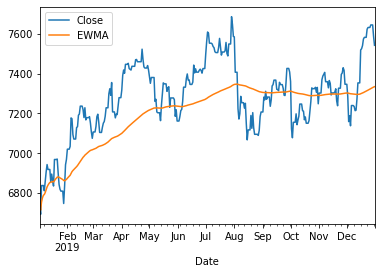

In [174]:
ftseTime[['Close','EWMA']].plot()

EWMA Strategy
- When the price crosses the EWMA curve from above - short (sell) the index - close price < EWMA
- When the price crosses the EWMA curve from below - long (buy) the index - close price > EWMA

In [175]:
ftseTime['Difference'] = ftseTime['Close'] - ftseTime['EWMA']
ftseTime.head()

,Close,EWMA,Difference
Date,,,
2019-01-02,6734.23,6734.230000,0.000000
2019-01-03,6692.66,6713.362846,-20.702846
2019-01-04,6837.42,6755.042556,82.377444
2019-01-05,6837.42,6775.881760,61.538240
2019-01-06,6837.42,6788.384761,49.035239


In [176]:
def trading_strat(num):
    if num > 0:
        return "Long"
    elif num <0:
        return "Short"
    else:
        return "Hold"

ftseTime['Trading_Strategy'] = ftseTime['Difference'].apply(trading_strat)
ftseTime.head()

,Close,EWMA,Difference,Trading_Strategy
Date,,,,
2019-01-02,6734.23,6734.230000,0.000000,Hold
2019-01-03,6692.66,6713.362846,-20.702846,Short
2019-01-04,6837.42,6755.042556,82.377444,Long
2019-01-05,6837.42,6775.881760,61.538240,Long
2019-01-06,6837.42,6788.384761,49.035239,Long


In [177]:
#Create new index for ftseTime df
ftseTime1 = ftseTime.reset_index()
ftseTime1.head()

,Date,Close,EWMA,Difference,Trading_Strategy
0,2019-01-02,6734.23,6734.230000,0.000000,Hold
1,2019-01-03,6692.66,6713.362846,-20.702846,Short
2,2019-01-04,6837.42,6755.042556,82.377444,Long
3,2019-01-05,6837.42,6775.881760,61.538240,Long
4,2019-01-06,6837.42,6788.384761,49.035239,Long


In [178]:
#Create new index for newsarticlesdf9 which contains sentiment analysis on headline and topic
newsarticlesdf10 = newsarticlesdf9.reset_index()
newsarticlesdf10.head()

,PublishDate,HeadlineCompound,TopicCompound
0,2019-01-01,-0.136527,-0.158900
1,2019-01-02,-0.196833,-0.095340
2,2019-01-03,-0.272550,-0.158900
3,2019-01-04,-0.094077,-0.151677
4,2019-01-05,-0.098175,-0.079450


In [179]:
ftseSentiment = pd.merge(ftseTime1,newsarticlesdf10,left_on = "Date", right_on = "PublishDate", how = "left")
ftseSentiment.head()

,Date,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound
0,2019-01-02,6734.23,6734.230000,0.000000,Hold,2019-01-02,-0.196833,-0.095340
1,2019-01-03,6692.66,6713.362846,-20.702846,Short,2019-01-03,-0.272550,-0.158900
2,2019-01-04,6837.42,6755.042556,82.377444,Long,2019-01-04,-0.094077,-0.151677
3,2019-01-05,6837.42,6775.881760,61.538240,Long,2019-01-05,-0.098175,-0.079450
4,2019-01-06,6837.42,6788.384761,49.035239,Long,2019-01-06,-0.147231,-0.146677


<b><u>Comments</u></b>
<br>
The initial strategy looks at the Exponential Weighted Moving Average over a calendar to year decide whether to buy, hold or sell the index. Incorporating the news headlines sentiment will be looked into now.

The logic for the new trading strategy will be:
- If the EWMA strategy states Long and both headline sentiment and topic sentiment are positive then buy the stock
- If the EWMA strategy states Short and both headline sentiment and topic sentiment are negative the sell the stock 
- If the EWMA strategy states hold and both headline sentiment and topic sentiment are neutral then hold the stock
- Otherwise hold the stock. 

In [180]:
def strategy(s):
    if (s['Trading_Strategy']  == "Long") & (s['HeadlineCompound'] > 0):
        return "Buy"
    elif (s['Trading_Strategy'] == "Short") & (s['HeadlineCompound'] <0):
        return "Sell"
    else:
        return "Hold"

ftseSentiment['Sentiment_Strategy'] = ftseSentiment.apply(strategy,axis = 1)
ftseSentiment.head()

,Date,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound,Sentiment_Strategy
0,2019-01-02,6734.23,6734.230000,0.000000,Hold,2019-01-02,-0.196833,-0.095340,Hold
1,2019-01-03,6692.66,6713.362846,-20.702846,Short,2019-01-03,-0.272550,-0.158900,Sell
2,2019-01-04,6837.42,6755.042556,82.377444,Long,2019-01-04,-0.094077,-0.151677,Hold
3,2019-01-05,6837.42,6775.881760,61.538240,Long,2019-01-05,-0.098175,-0.079450,Hold
4,2019-01-06,6837.42,6788.384761,49.035239,Long,2019-01-06,-0.147231,-0.146677,Hold


In [181]:
ftseSentiment['Sentiment_Strategy'].unique()

array(['Hold', 'Sell', 'Buy'], dtype=object)

In [182]:
#Make Date the index for the dataframe
ftseSentiment1 = ftseSentiment.set_index('Date')
ftseSentiment1.head()

,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound,Sentiment_Strategy
Date,,,,,,,,
2019-01-02,6734.23,6734.230000,0.000000,Hold,2019-01-02,-0.196833,-0.095340,Hold
2019-01-03,6692.66,6713.362846,-20.702846,Short,2019-01-03,-0.272550,-0.158900,Sell
2019-01-04,6837.42,6755.042556,82.377444,Long,2019-01-04,-0.094077,-0.151677,Hold
2019-01-05,6837.42,6775.881760,61.538240,Long,2019-01-05,-0.098175,-0.079450,Hold
2019-01-06,6837.42,6788.384761,49.035239,Long,2019-01-06,-0.147231,-0.146677,Hold


In [183]:
#Normalize the close price and EWMA to plot headline sentiment values on same graph using standardscaler. 
ftseSentiment1[['Close','EWMA','HeadlineCompound',]] = StandardScaler().fit_transform(ftseSentiment[['Close','EWMA','HeadlineCompound']])
ftseSentiment1.head()

,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound,Sentiment_Strategy
Date,,,,,,,,
2019-01-02,-2.924193,-2.980599,0.000000,Hold,2019-01-02,-0.579555,-0.095340,Hold
2019-01-03,-3.146790,-3.115030,-20.702846,Short,2019-01-03,-1.439429,-0.158900,Sell
2019-01-04,-2.371636,-2.846519,82.377444,Long,2019-01-04,0.587392,-0.151677,Hold
2019-01-05,-2.371636,-2.712267,61.538240,Long,2019-01-05,0.540856,-0.079450,Hold
2019-01-06,-2.371636,-2.631720,49.035239,Long,2019-01-06,-0.016245,-0.146677,Hold


Text(0.5, 1.0, 'FTSE 100 with 1 year EWMA and headline sentiment')

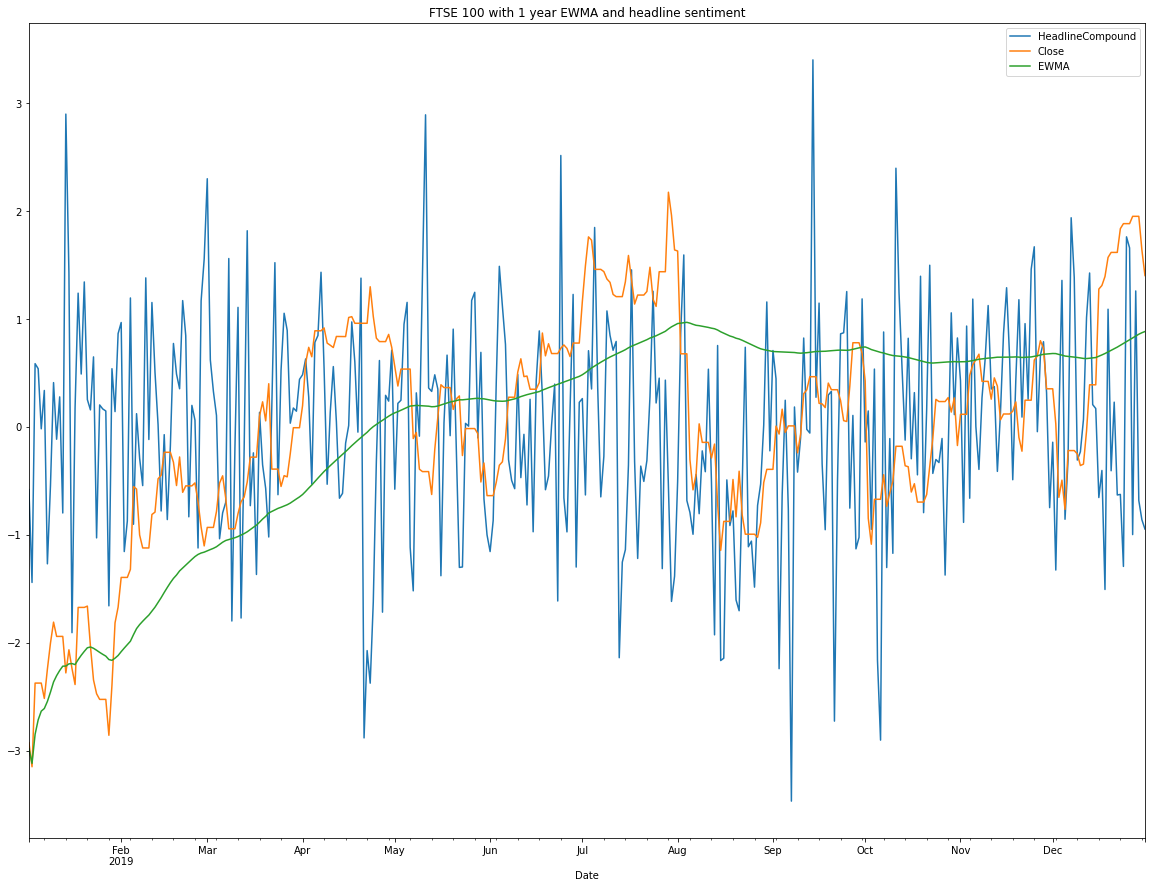

In [184]:
#Plot headlinecompound first to overlay the index values on top
ftseSentiment1[['HeadlineCompound','Close','EWMA']].plot(figsize = (20,15))
plt.title('FTSE 100 with 1 year EWMA and headline sentiment')

<b><u>Comments</u></b>
<br>
There is a lot of noise which can be seen above from the sentiment analysis on the news headlines. The lag of when news headlines are published and when this is incorporated in the price of the index can be seen. In mid 2019, a news headline had a high positive sentiment score and a few days later the stock price had increased. To improve on this, key words should be looked at to look at the impact on the stock market.

#### Q. The news articles have been publlished by The Guardian, but do these news articles have an effect on other Global indicies?

In [185]:
#Apply the EWMA with a period of 1 year similar to the FTSE 100 dataframe
SP500Conversion['EWMA'] = SP500Conversion['SP500_Close_USD'].ewm(span=253).mean()
SP500Conversion.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA
Date,,,,,
2019-01-01,2506.850098,1.2752,-0.05%,3196.735245,2506.850098
2019-01-02,2510.030029,1.2610,-1.11%,3165.147867,2508.446348
2019-01-03,2447.889893,1.2633,0.18%,3092.419301,2488.101084
2019-01-04,2531.939941,1.2728,0.75%,3222.653157,2499.191097
2019-01-05,2531.939941,1.2728,NaN,3222.653157,2505.844827


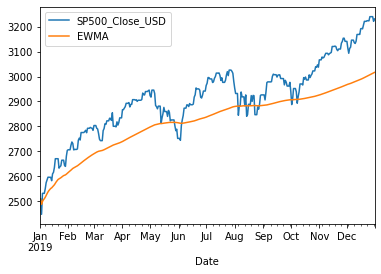

In [186]:
SP500Conversion[['SP500_Close_USD','EWMA']].plot()

In [187]:
SP500Conversion['Difference'] = SP500Conversion['SP500_Close_USD'] - SP500Conversion['EWMA']
SP500Conversion.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference
Date,,,,,,
2019-01-01,2506.850098,1.2752,-0.05%,3196.735245,2506.850098,0.000000
2019-01-02,2510.030029,1.2610,-1.11%,3165.147867,2508.446348,1.583681
2019-01-03,2447.889893,1.2633,0.18%,3092.419301,2488.101084,-40.211192
2019-01-04,2531.939941,1.2728,0.75%,3222.653157,2499.191097,32.748845
2019-01-05,2531.939941,1.2728,NaN,3222.653157,2505.844827,26.095114


In [188]:
def trading_strat(num):
    if num > 0:
        return "Long"
    elif num <0:
        return "Short"
    else:
        return "Hold"

SP500Conversion['Trading_Strategy'] = SP500Conversion['Difference'].apply(trading_strat)
SP500Conversion.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference,Trading_Strategy
Date,,,,,,,
2019-01-01,2506.850098,1.2752,-0.05%,3196.735245,2506.850098,0.000000,Hold
2019-01-02,2510.030029,1.2610,-1.11%,3165.147867,2508.446348,1.583681,Long
2019-01-03,2447.889893,1.2633,0.18%,3092.419301,2488.101084,-40.211192,Short
2019-01-04,2531.939941,1.2728,0.75%,3222.653157,2499.191097,32.748845,Long
2019-01-05,2531.939941,1.2728,NaN,3222.653157,2505.844827,26.095114,Long


In [189]:
#Add sentiment scores to the stock data 
# steps - reset index for both ftse and news articles df 
#Join on date
#plot sentiment against the time series plot

#Create new index for ftseTime df
SP500Conversion1 = SP500Conversion.reset_index()
SP500Conversion1.head()

,Date,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference,Trading_Strategy
0,2019-01-01,2506.850098,1.2752,-0.05%,3196.735245,2506.850098,0.000000,Hold
1,2019-01-02,2510.030029,1.2610,-1.11%,3165.147867,2508.446348,1.583681,Long
2,2019-01-03,2447.889893,1.2633,0.18%,3092.419301,2488.101084,-40.211192,Short
3,2019-01-04,2531.939941,1.2728,0.75%,3222.653157,2499.191097,32.748845,Long
4,2019-01-05,2531.939941,1.2728,NaN,3222.653157,2505.844827,26.095114,Long


In [190]:
SP500Sentiment = pd.merge(SP500Conversion1,newsarticlesdf10,left_on = "Date", right_on = "PublishDate", how = "left")
SP500Sentiment.head()

,Date,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound
0,2019-01-01,2506.850098,1.2752,-0.05%,3196.735245,2506.850098,0.000000,Hold,2019-01-01,-0.136527,-0.158900
1,2019-01-02,2510.030029,1.2610,-1.11%,3165.147867,2508.446348,1.583681,Long,2019-01-02,-0.196833,-0.095340
2,2019-01-03,2447.889893,1.2633,0.18%,3092.419301,2488.101084,-40.211192,Short,2019-01-03,-0.272550,-0.158900
3,2019-01-04,2531.939941,1.2728,0.75%,3222.653157,2499.191097,32.748845,Long,2019-01-04,-0.094077,-0.151677
4,2019-01-05,2531.939941,1.2728,NaN,3222.653157,2505.844827,26.095114,Long,2019-01-05,-0.098175,-0.079450


In [191]:
#Make Date the index for the dataframe
SP500Sentiment1 = SP500Sentiment.set_index('Date')
SP500Sentiment1.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound
Date,,,,,,,,,,
2019-01-01,2506.850098,1.2752,-0.05%,3196.735245,2506.850098,0.000000,Hold,2019-01-01,-0.136527,-0.158900
2019-01-02,2510.030029,1.2610,-1.11%,3165.147867,2508.446348,1.583681,Long,2019-01-02,-0.196833,-0.095340
2019-01-03,2447.889893,1.2633,0.18%,3092.419301,2488.101084,-40.211192,Short,2019-01-03,-0.272550,-0.158900
2019-01-04,2531.939941,1.2728,0.75%,3222.653157,2499.191097,32.748845,Long,2019-01-04,-0.094077,-0.151677
2019-01-05,2531.939941,1.2728,NaN,3222.653157,2505.844827,26.095114,Long,2019-01-05,-0.098175,-0.079450


In [192]:
#Normalize the close price and EWMA to plot headline sentiment values on same graph using standardscaler. 
SP500Sentiment1[['SP500_Close_USD','EWMA','HeadlineCompound']] = StandardScaler().fit_transform(SP500Sentiment1[['SP500_Close_USD','EWMA','HeadlineCompound']])
SP500Sentiment1.head()

,SP500_Close_USD,USD_Price,Change %,SP500_Close_GBP,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound
Date,,,,,,,,,,
2019-01-01,-2.669072,1.2752,-0.05%,3196.735245,-2.567821,0.000000,Hold,2019-01-01,0.105170,-0.158900
2019-01-02,-2.648221,1.2610,-1.11%,3165.147867,-2.554683,1.583681,Long,2019-01-02,-0.580630,-0.095340
2019-01-03,-3.055685,1.2633,0.18%,3092.419301,-2.722143,-40.211192,Short,2019-01-03,-1.441672,-0.158900
2019-01-04,-2.504553,1.2728,0.75%,3222.653157,-2.630862,32.748845,Long,2019-01-04,0.587900,-0.151677
2019-01-05,-2.504553,1.2728,NaN,3222.653157,-2.576096,26.095114,Long,2019-01-05,0.541301,-0.079450


Text(0.5, 1.0, 'S&P 500 with 1 year EWMA and headline sentiment')

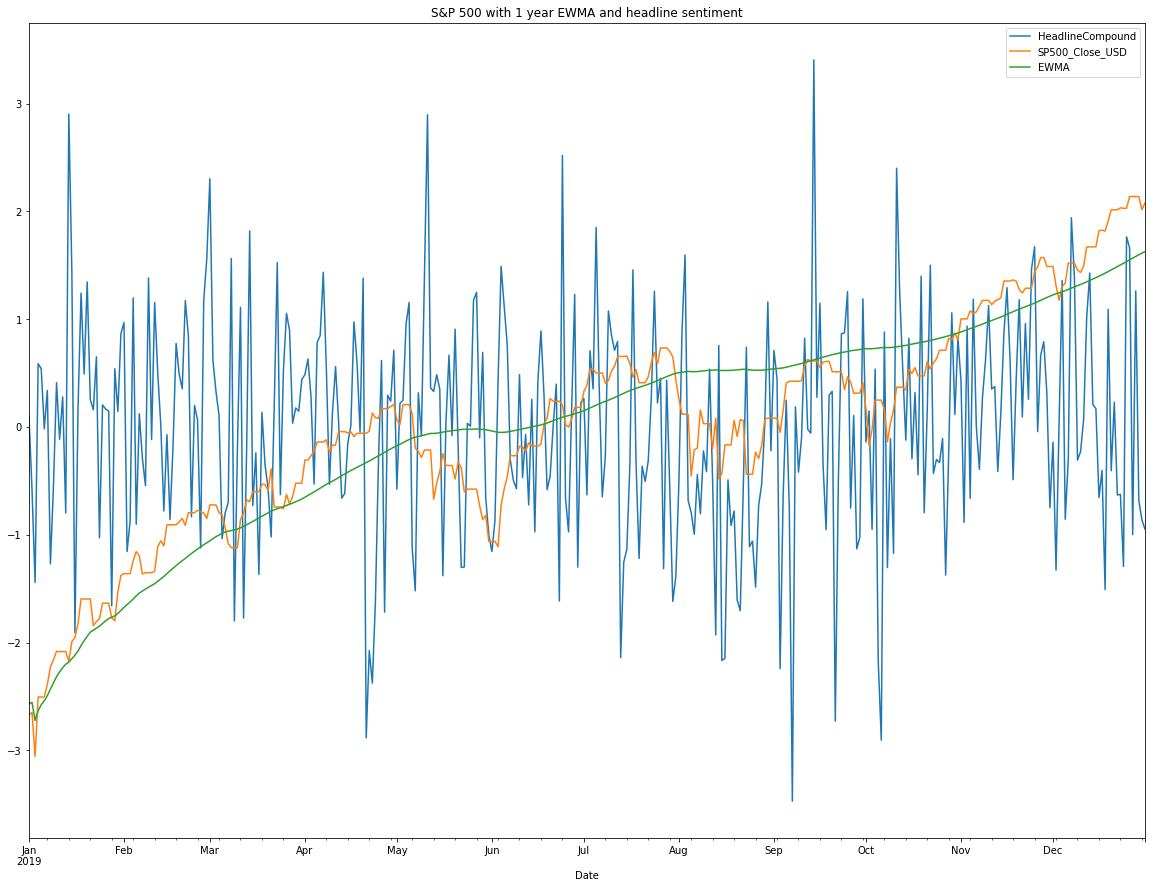

In [193]:
#Plot headlinecompound first to overlay the index values on top
SP500Sentiment1[['HeadlineCompound','SP500_Close_USD','EWMA']].plot(figsize = (20,15))
plt.title('S&P 500 with 1 year EWMA and headline sentiment')

<b><u>Comments</u></b>
<br>
There is a considerable amount of noise present in the news headline sentiment. However, there are some trends such as in June the stock price hit a low point and there was a negative news sentiment.


#### Q. Is there any correlation between news headline sentiment and stock price?

Text(0.5, 1.0, 'Correlation Heatmap of FTSE 100 and Headline Sentiment')

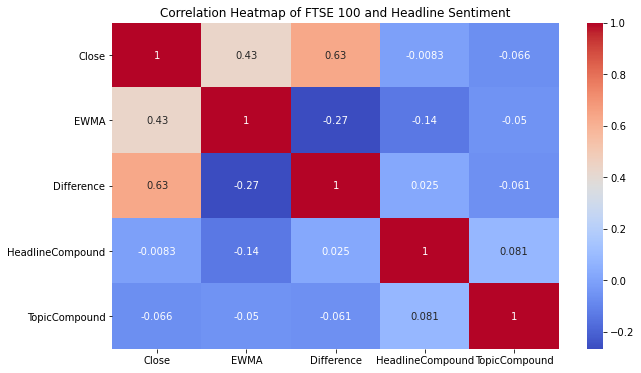

In [194]:
plt.subplots(figsize = (10,6))
graph1 = sns.heatmap(ftseSentiment.corr(method = 'spearman'),cmap = 'coolwarm',annot = True)
plt.title('Correlation Heatmap of FTSE 100 and Headline Sentiment')

Text(0.5, 1.0, 'Correlation Heatmap of S&P 500 and Headline Sentiment')

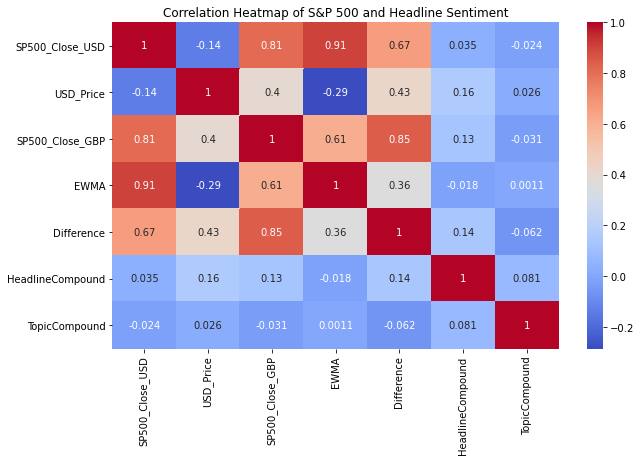

In [195]:
plt.subplots(figsize = (10,6))
graph1 = sns.heatmap(SP500Sentiment.corr(method = 'spearman'),cmap = 'coolwarm',annot = True)
plt.title('Correlation Heatmap of S&P 500 and Headline Sentiment')

<b><u>Comments</u></b>
<br>
Spearman correlation is used to measure the degree of association between two variables [34]. There is a weak negative correlation between the headline sentiment and closing price of the stock index for both FTSE 100 and S&P500. This may produce poor results when looking at how the stock price changes with news headlines.


#### Q. Can news headline sentiment be used to predict the stock index values?

##### Multiple Linear Regression

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [197]:
ftseSentiment.head()

,Date,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound,Sentiment_Strategy
0,2019-01-02,6734.23,6734.230000,0.000000,Hold,2019-01-02,-0.196833,-0.095340,Hold
1,2019-01-03,6692.66,6713.362846,-20.702846,Short,2019-01-03,-0.272550,-0.158900,Sell
2,2019-01-04,6837.42,6755.042556,82.377444,Long,2019-01-04,-0.094077,-0.151677,Hold
3,2019-01-05,6837.42,6775.881760,61.538240,Long,2019-01-05,-0.098175,-0.079450,Hold
4,2019-01-06,6837.42,6788.384761,49.035239,Long,2019-01-06,-0.147231,-0.146677,Hold


In [198]:
#Format date to ordinal to run through linear regression model as linear regression model does not accept date as datetime format
import datetime as dt
ftseSentiment['DateOrdinal'] = ftseSentiment['Date'].map(dt.datetime.toordinal)
ftseSentiment['PublishDateOrdinal'] = ftseSentiment['PublishDate'].map(dt.datetime.toordinal)
ftseSentiment.head()


,Date,Close,EWMA,Difference,Trading_Strategy,PublishDate,HeadlineCompound,TopicCompound,Sentiment_Strategy,DateOrdinal,PublishDateOrdinal
0,2019-01-02,6734.23,6734.230000,0.000000,Hold,2019-01-02,-0.196833,-0.095340,Hold,737061,737061
1,2019-01-03,6692.66,6713.362846,-20.702846,Short,2019-01-03,-0.272550,-0.158900,Sell,737062,737062
2,2019-01-04,6837.42,6755.042556,82.377444,Long,2019-01-04,-0.094077,-0.151677,Hold,737063,737063
3,2019-01-05,6837.42,6775.881760,61.538240,Long,2019-01-05,-0.098175,-0.079450,Hold,737064,737064
4,2019-01-06,6837.42,6788.384761,49.035239,Long,2019-01-06,-0.147231,-0.146677,Hold,737065,737065


In [199]:
X = ftseSentiment[['DateOrdinal','PublishDateOrdinal','HeadlineCompound']]
y = ftseSentiment['Close']

In [200]:
X.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound
0,737061,737061,-0.196833
1,737062,737062,-0.272550
2,737063,737063,-0.094077
3,737064,737064,-0.098175
4,737065,737065,-0.147231


In [201]:
y.head()

0    6734.23
1    6692.66
2    6837.42
3    6837.42
4    6837.42
Name: Close, dtype: float64

In [202]:
#Split the dataframe into training and test sets. Code for MLR adapted from StackAbuse.com[35]
#Enter a value for random state for reproducibility
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [203]:
#Create MLR
from sklearn.linear_model import LinearRegression
mlr_mod = LinearRegression()

In [204]:
X_train.fillna(X_train.mean(),inplace = True)
X_test.fillna(X_test.mean(),inplace = True)

c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [205]:
#Fit the model
mlr_mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
#make predictions on the test set
pred_price = mlr_mod.predict(X_test)

In [207]:
pred_price[1]

7288.9343280051835

In [208]:
#compute RMSE and R2 statistics
test_set_rmse = (np.sqrt(mean_squared_error(y_test,pred_price)))
test_set_r2 = r2_score(y_test,pred_price)

In [209]:
print(test_set_rmse)

11037.515378099888


In [210]:
print(test_set_r2)

-2813.835198830581


In [211]:
prediction_values = pd.DataFrame({'Actual':y_test,'Predicted':pred_price})
prediction_values.head()

,Actual,Predicted
193,7505.97,7274.399912
33,7034.13,7288.934328
15,6834.92,7282.870431
347,7353.44,23666.850423
57,7074.73,23675.081789


In [212]:
X_test

,DateOrdinal,PublishDateOrdinal,HeadlineCompound
193,737254,737254,-0.255967
33,737094,737094,-0.040483
15,737076,737076,-0.130385
347,737408,737408,-0.130681
57,737118,737118,-0.008645
...,...,...,...
158,737219,737219,-0.196070
234,737295,737295,-0.243425
359,737420,737420,-0.233506
208,737269,737269,-0.194316


In [213]:
y_test

193    7505.97
33     7034.13
15     6834.92
347    7353.44
57     7074.73
        ...   
158    7331.94
234    7094.98
359    7644.90
208    7686.61
242    7207.18
Name: Close, Length: 110, dtype: float64

In [214]:
#Merge predicted values to the X_test by index
predicted_test_set = X_test.merge(prediction_values,left_index = True, right_index = True)
predicted_test_set.reset_index(drop = True, inplace = True)
predicted_test_set.head()


,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted
0,737254,737254,-0.255967,7505.97,7274.399912
1,737094,737094,-0.040483,7034.13,7288.934328
2,737076,737076,-0.130385,6834.92,7282.870431
3,737408,737408,-0.130681,7353.44,23666.850423
4,737118,737118,-0.008645,7074.73,23675.081789


In [215]:
dt = datetime.fromordinal(736390)
dt

datetime.datetime(2017, 3, 2, 0, 0)

In [216]:
#Change Date column from ordinal to datetime to plot
predicted_test_set['NewDate'] = predicted_test_set['DateOrdinal'].map(date.fromordinal)
predicted_test_set.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted,NewDate
0,737254,737254,-0.255967,7505.97,7274.399912,2019-07-14
1,737094,737094,-0.040483,7034.13,7288.934328,2019-02-04
2,737076,737076,-0.130385,6834.92,7282.870431,2019-01-17
3,737408,737408,-0.130681,7353.44,23666.850423,2019-12-15
4,737118,737118,-0.008645,7074.73,23675.081789,2019-02-28


In [217]:
#Sort the df by publish date and reset the index
predicted_test_set.sort_values(by = 'NewDate',inplace = True)
predicted_test_set.reset_index(drop = True, inplace = True)
predicted_test_set.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted,NewDate
0,737061,737061,-0.196833,6734.23,23662.388460,2019-01-02
1,737064,737064,-0.098175,6837.42,7285.042972,2019-01-05
2,737066,737066,-0.115948,6810.88,7283.844207,2019-01-07
3,737068,737068,-0.193531,6906.63,23662.611218,2019-01-09
4,737070,737070,-0.155727,6918.18,23665.161090,2019-01-11


In [218]:
#Set NewDate as the index
predicted_test_set1 = predicted_test_set.set_index('NewDate')
predicted_test_set1.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted
NewDate,,,,,
2019-01-02,737061,737061,-0.196833,6734.23,23662.388460
2019-01-05,737064,737064,-0.098175,6837.42,7285.042972
2019-01-07,737066,737066,-0.115948,6810.88,7283.844207
2019-01-09,737068,737068,-0.193531,6906.63,23662.611218
2019-01-11,737070,737070,-0.155727,6918.18,23665.161090


Text(0.5, 1.0, 'Actual vs Predicted Closing Price values of FTSE 100 using Multiple Linear Regression')

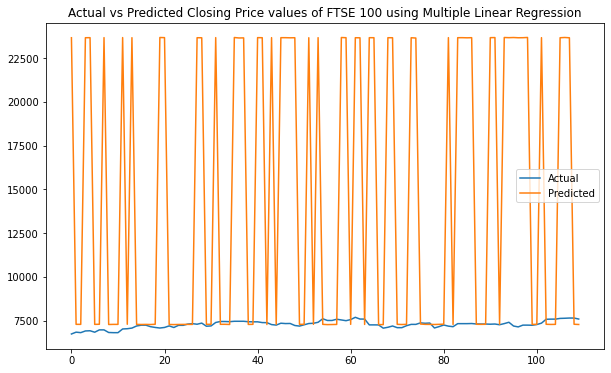

In [236]:
predicted_test_set[['Actual','Predicted']].plot(figsize = (10,6))
plt.title('Actual vs Predicted Closing Price values of FTSE 100 using Multiple Linear Regression')

<b><u>Comments</u></b>
<br>
Although the predicted values follow the same trend as the actual closing price values, the linear regression model does not capture the sudden drops of the price such as during the financial crisis. If the linear regression model was implemented to predict stock prices, heavy losses would have been suffered during the financial crisis.

#### Random Forest Regression

In [220]:
from sklearn.ensemble.forest import RandomForestRegressor

c:\users\shivam dixit\documents\blkhack\impact-of-news-headlines-on-stock-indices-master\newblkhack\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [221]:
#Code for Random Forest adapted from PythonData.com [36]
RF_Model = RandomForestRegressor(n_estimators = 100, oob_score = True)

In [222]:
#Fit the model
randomforest = RF_Model.fit(X_train,y_train)

In [223]:
rf_test_pred = RF_Model.predict(X_test)

In [224]:
rf_test_pred[1]

7042.7825999999895

In [225]:
rf_test_set_rmse = (np.sqrt(mean_squared_error(y_test,rf_test_pred)))
rf_test_set_r2 = r2_score(y_test,rf_test_pred)

In [226]:
print(rf_test_set_rmse)

46.29316599251556


In [227]:
print(rf_test_set_r2)

0.9504841662354343


In [228]:
rf_prediction_values = pd.DataFrame({'Actual':y_test,'Predicted':rf_test_pred})
rf_prediction_values.head()

,Actual,Predicted
193,7505.97,7523.6651
33,7034.13,7042.7826
15,6834.92,6905.6246
347,7353.44,7399.4810
57,7074.73,7112.0175


In [229]:
#Merge predicted values to the X_test by index
rf_predicted_test_set = X_test.merge(rf_prediction_values,left_index = True, right_index = True)
rf_predicted_test_set.reset_index(drop = True, inplace = True)
rf_predicted_test_set.head()



,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted
0,737254,737254,-0.255967,7505.97,7523.6651
1,737094,737094,-0.040483,7034.13,7042.7826
2,737076,737076,-0.130385,6834.92,6905.6246
3,737408,737408,-0.130681,7353.44,7399.4810
4,737118,737118,-0.008645,7074.73,7112.0175


In [230]:
#Change Date column from ordinal to datetime to plot
rf_predicted_test_set['NewDate'] = rf_predicted_test_set['DateOrdinal'].map(date.fromordinal)
rf_predicted_test_set.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted,NewDate
0,737254,737254,-0.255967,7505.97,7523.6651,2019-07-14
1,737094,737094,-0.040483,7034.13,7042.7826,2019-02-04
2,737076,737076,-0.130385,6834.92,6905.6246,2019-01-17
3,737408,737408,-0.130681,7353.44,7399.4810,2019-12-15
4,737118,737118,-0.008645,7074.73,7112.0175,2019-02-28


In [231]:
#Sort the df by publish date and reset the index
rf_predicted_test_set.sort_values(by = 'NewDate',inplace = True)
rf_predicted_test_set.reset_index(drop = True, inplace = True)
rf_predicted_test_set.head()

,DateOrdinal,PublishDateOrdinal,HeadlineCompound,Actual,Predicted,NewDate
0,737061,737061,-0.196833,6734.23,6834.7787,2019-01-02
1,737064,737064,-0.098175,6837.42,6857.7906,2019-01-05
2,737066,737066,-0.115948,6810.88,6868.0081,2019-01-07
3,737068,737068,-0.193531,6906.63,6878.7053,2019-01-09
4,737070,737070,-0.155727,6918.18,6910.0749,2019-01-11


Text(0.5, 1.0, 'Actual vs Predicted Closing Price values of FTSE 100 using Random Forest Regression')

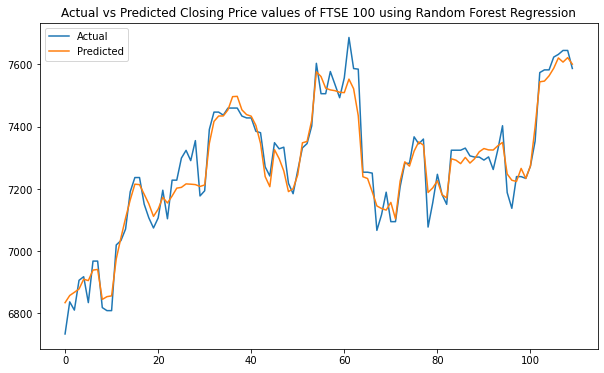

In [235]:
rf_predicted_test_set[['Actual','Predicted']].plot(figsize = (10,6))
plt.title('Actual vs Predicted Closing Price values of FTSE 100 using Random Forest Regression')

<b><u>Comments</u></b>
<br>
The Random Forest Regression model follows the upward trend of the FTSE 100 close price. Providing better way to predict. The RF model  has a R2 statistic of 0.99689 indicating that the model has overfitted.